# For Loop Notebook

# KNN Optimization

Iter: 5:  80%|████████  | 76/95 [00:04<00:01, 17.92it/s]


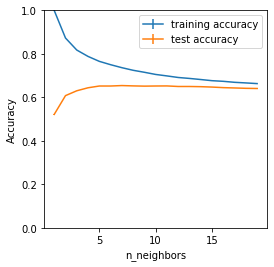

Highest Test Set Achieved = 0.654569
Best Nearest Neighbor Parameter = 7


In [53]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5
neighbors_settings = range(1, 20)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(1,yz,1):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        for n_neighbors in neighbors_settings:   
            clf = KNeighborsRegressor(n_neighbors=n_neighbors)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy

fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1)) +1
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Nearest Neighbor Parameter = %d" %n_neighbor_best)
table.loc['KNN'] = [np.amax(lahat_train.mean(axis=1)),np.amax(lahat_test.mean(axis=1)), n_neighbor_best]


# Linear Regression Optimization 

Iter: 5: 100%|██████████| 5/5 [00:00<00:00, 80.86it/s]


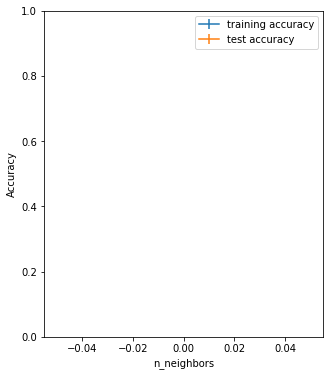

Highest Test Set Achieved = 0.632747


In [54]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5
neighbors_settings = range(0, 1)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        for n_neighbors in neighbors_settings:   
            clf = LinearRegression()  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy

fig = plt.figure(figsize=(5, 6))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))

table.loc['LR'] = [np.amax(lahat_train.mean(axis=1)),np.amax(lahat_test.mean(axis=1)), 'N/A']


# Ridge

Iter: 5: 100%|██████████| 95/95 [00:00<00:00, 269.45it/s]


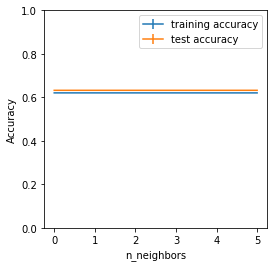

Highest Test Set Achieved = 0.632771
Best Alpha = 3


In [55]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5
neighbors_settings=[1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,
                            1e-3,1e-2,0.1, 0.2,0.4,0.75, 1, 1.5, 3, 5]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        neighbors_settings=[1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,
                            1e-3,1e-2,0.1, 0.2,0.4,0.75, 1, 1.5, 3, 5]
        
        for n_neighbors in neighbors_settings:   
            clf = Ridge(alpha=n_neighbors)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Alpha = %d" %neighbors_settings[n_neighbor_best])
table.loc['Ridge'] = [np.amax(lahat_train.mean(axis=1)),np.amax(lahat_test.mean(axis=1)), neighbors_settings[n_neighbor_best]]


# Lasso

Iter: 1:   0%|          | 0/95 [00:00<?, ?it/s]C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0840324567609716e+16, tolerance: 16258827950958.6
  positive)
C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0796259708081348e+16, tolerance: 16258827950958.6
  positive)
Iter: 1:   2%|▏         | 2/95 [00:00<00:07, 11.81it/s]C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.033489120033539e+16, tolerance: 16258827950958.6
  positive)
C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\sklear

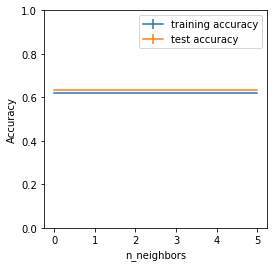

Highest Test Set Achieved = 0.632747
Best Alpha = 5


In [57]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5
from sklearn.linear_model import Lasso
neighbors_settings=[1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,
                            1e-3,1e-2,0.1, 0.2,0.4,0.75, 1, 1.5, 3, 5]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = Lasso(alpha=n_neighbors,max_iter=1000)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Alpha = %d" %neighbors_settings[n_neighbor_best])
table.loc['Lasso'] = [np.amax(lahat_train.mean(axis=1)),np.amax(lahat_test.mean(axis=1)),neighbors_settings[n_neighbor_best]]


# Decision Tree

Iter: 5: 100%|██████████| 245/245 [00:05<00:00, 48.83it/s]


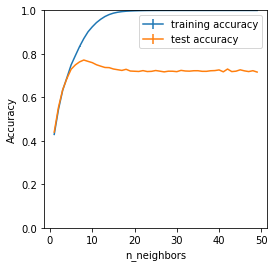

Highest Test Set Achieved = 0.772066
Best Depth = 7


In [58]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=range(1,50)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = DecisionTreeRegressor(max_depth=n_neighbors)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Depth = %d" %n_neighbor_best)
table.loc['DecisionTree'] = [np.amax(lahat_train.mean(axis=1)),np.amax(lahat_test.mean(axis=1)), n_neighbor_best]


# Random Forest

Iter: 5: 100%|██████████| 95/95 [00:46<00:00,  2.04it/s]


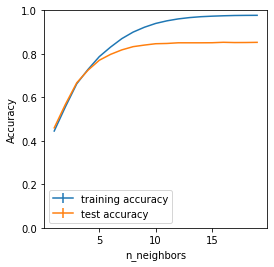

Highest Test Set Achieved = 0.853575
Best Depth = 15


In [59]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=range(1,20)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = RandomForestRegressor(max_depth=n_neighbors,
                                        n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Depth = %d" %n_neighbor_best)
table.loc['RandomForest Depth'] = [np.amax(lahat_train.mean(axis=1)),np.amax(lahat_test.mean(axis=1)), n_neighbor_best]


Iter: 5: 100%|██████████| 50/50 [01:36<00:00,  1.92s/it]


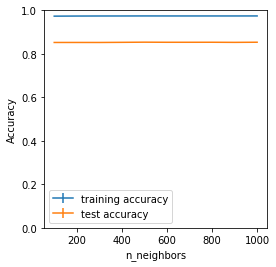

Highest Test Set Achieved = 0.854108
Best Estimator = 500


In [60]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[100,200,300,400,500,600,700,800,900,1000]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = RandomForestRegressor(max_depth=15,
                                        n_estimators=n_neighbors,n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Estimator = %d" %neighbors_settings[n_neighbor_best])
table.loc['RandomForest Estimators'] = [np.amax(lahat_train.mean(axis=1)),np.amax(lahat_test.mean(axis=1)),neighbors_settings[n_neighbor_best]]


# Extra Trees

Iter: 5: 100%|██████████| 95/95 [00:37<00:00,  2.55it/s]


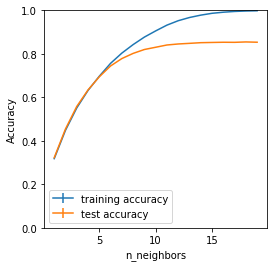

Highest Test Set Achieved = 0.855184
Best Depth = 17


In [61]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=range(1,20)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = ExtraTreesRegressor(max_depth=n_neighbors,
                                        n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Depth = %d" %n_neighbor_best)
table.loc['ExtraTreesRegressor Depth'] = [np.amax(lahat_train.mean(axis=1)),np.amax(lahat_test.mean(axis=1)), n_neighbor_best]


Iter: 5: 100%|██████████| 50/50 [01:10<00:00,  1.42s/it]


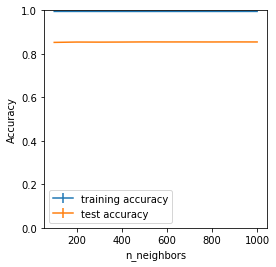

Highest Test Set Achieved = 0.855298
Best Estimator = 900


In [62]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[100,200,300,400,500,600,700,800,900,1000]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = ExtraTreesRegressor(max_depth=17,
                                        n_estimators=n_neighbors,
                                        n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Estimator = %d" %neighbors_settings[n_neighbor_best])
table.loc['ExtraTreesRegressor Estimator'] = [np.amax(lahat_train.mean(axis=1)),
                                              np.amax(lahat_test.mean(axis=1)),
                                              neighbors_settings[n_neighbor_best]]


# Gradient Boosting Method

Iter: 5: 100%|██████████| 95/95 [01:53<00:00,  1.19s/it]


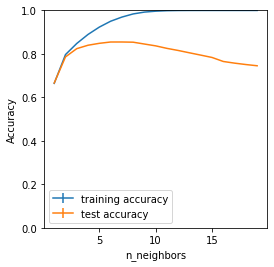

Highest Test Set Achieved = 0.854964
Best Depth = 6


In [63]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=range(1,20)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = GradientBoostingRegressor(max_depth=n_neighbors)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Depth = %d" %n_neighbor_best)
table.loc['Gradient Boosting Depth'] = [np.amax(lahat_train.mean(axis=1)),
                                        np.amax(lahat_test.mean(axis=1)),
                                        n_neighbor_best]


Iter: 5: 100%|██████████| 50/50 [03:25<00:00,  4.10s/it]


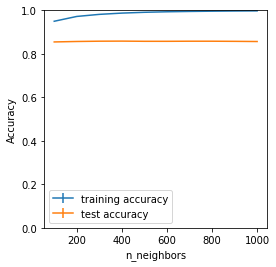

Highest Test Set Achieved = 0.859004
Best Estimator = 400


In [64]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[100,200,300,400,500,600,700,800,900,1000]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = GradientBoostingRegressor(max_depth=6,
                                        n_estimators=n_neighbors)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Estimator = %d" %neighbors_settings[n_neighbor_best])
table.loc['Gradient Boosting Estimators'] = [np.amax(lahat_train.mean(axis=1)),
                                             np.amax(lahat_test.mean(axis=1)),
                                             neighbors_settings[n_neighbor_best]]


Iter: 5: 100%|██████████| 65/65 [03:15<00:00,  3.01s/it]


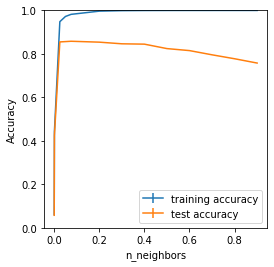

Highest Test Set Achieved = 0.858343
Best learning rate = 0


In [65]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[0.0001,0.001,0.025,0.05,0.075,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = GradientBoostingRegressor(max_depth=6,
                                        n_estimators=400,
                                            learning_rate=n_neighbors)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best learning rate = %d" %neighbors_settings[n_neighbor_best])
table.loc['Gradient Boosting learning rate'] = [np.amax(lahat_train.mean(axis=1)),
                                                np.amax(lahat_test.mean(axis=1)), 
                                                neighbors_settings[n_neighbor_best]]


In [67]:
n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best learning rate = " ,neighbors_settings[n_neighbor_best])
table.loc['Gradient Boosting learning rate'] = [np.amax(lahat_train.mean(axis=1)),
                                                np.amax(lahat_test.mean(axis=1)), 
                                                neighbors_settings[n_neighbor_best]]

Highest Test Set Achieved = 0.858343
Best learning rate =  0.075


# XGB

Iter: 5: 100%|██████████| 95/95 [00:44<00:00,  2.11it/s]


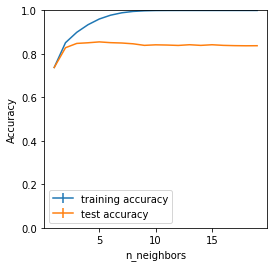

Highest Test Set Achieved = 0.855406
Best Depth = 4


In [68]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=range(1,20)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = XGBRegressor(max_depth=n_neighbors)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Depth = %d" %n_neighbor_best)
table.loc['XGB Boosting Depth'] = [np.amax(lahat_train.mean(axis=1)),
                                        np.amax(lahat_test.mean(axis=1)),
                                        n_neighbor_best]


Iter: 5: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


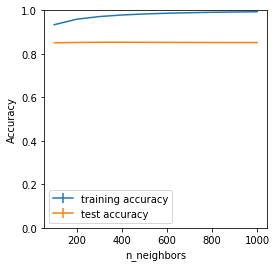

Highest Test Set Achieved = 0.853862
Best Estimator = 400


In [69]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[100,200,300,400,500,600,700,800,900,1000]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = XGBRegressor(max_depth=4,
                                        n_estimators=n_neighbors,n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Estimator = %d" %neighbors_settings[n_neighbor_best])
table.loc['XGB Boosting Estimators'] = [np.amax(lahat_train.mean(axis=1)),
                                             np.amax(lahat_test.mean(axis=1)),
                                             neighbors_settings[n_neighbor_best]]


Iter: 5: 100%|██████████| 65/65 [00:34<00:00,  1.88it/s]


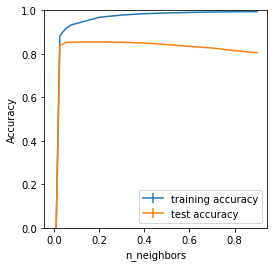

Highest Test Set Achieved = 0.854971
Best learning rate =  0.2


In [70]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[0.0001,0.001,0.025,0.05,0.075,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = XGBRegressor(max_depth=4,
                                        n_estimators=400,
                                            learning_rate=n_neighbors,n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best learning rate = ",neighbors_settings[n_neighbor_best])
table.loc['XGB Boosting learning rate'] = [np.amax(lahat_train.mean(axis=1)),
                                                np.amax(lahat_test.mean(axis=1)), 
                                                neighbors_settings[n_neighbor_best]]


# Light Boost

Iter: 5: 100%|██████████| 95/95 [00:12<00:00,  7.61it/s]


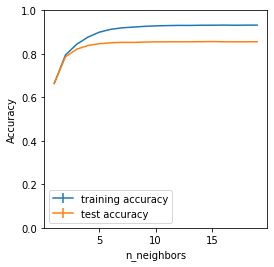

Highest Test Set Achieved = 0.856937
Best Depth = 14


In [71]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=range(1,20)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = LGBMRegressor(max_depth=n_neighbors,n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Depth = %d" %n_neighbor_best)
table.loc['LGBM Boosting Depth'] = [np.amax(lahat_train.mean(axis=1)),
                                        np.amax(lahat_test.mean(axis=1)),
                                        n_neighbor_best]


Iter: 5: 100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


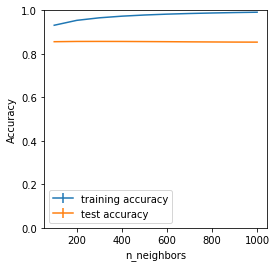

Highest Test Set Achieved = 0.857619
Best Estimator = 300


In [72]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[100,200,300,400,500,600,700,800,900,1000]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = LGBMRegressor(max_depth=14,
                                        n_estimators=n_neighbors,n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Estimator = %d" %neighbors_settings[n_neighbor_best])
table.loc['LGBM Boosting Estimators'] = [np.amax(lahat_train.mean(axis=1)),
                                             np.amax(lahat_test.mean(axis=1)),
                                             neighbors_settings[n_neighbor_best]]


Iter: 5: 100%|██████████| 65/65 [00:29<00:00,  2.19it/s]


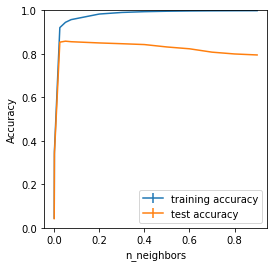

Highest Test Set Achieved = 0.858724
Best learning rate = 0.05


In [74]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[0.0001,0.001,0.025,0.05,0.075,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = LGBMRegressor(max_depth=14,
                                        n_estimators=300,
                                            learning_rate=n_neighbors,n_jobs=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best learning rate =" ,neighbors_settings[n_neighbor_best])
table.loc['LGBM Boosting learning rate'] = [np.amax(lahat_train.mean(axis=1)),
                                                np.amax(lahat_test.mean(axis=1)), 
                                                neighbors_settings[n_neighbor_best]]


# Catboost

Iter: 5: 100%|██████████| 55/55 [06:52<00:00,  7.50s/it]


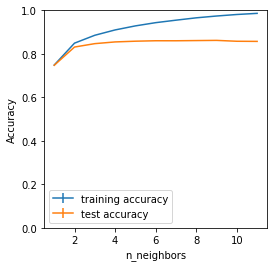

Highest Test Set Achieved = 0.862357
Best Depth = 8


In [80]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz= 5

neighbors_settings=range(1,12)
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = CatBoostRegressor(max_depth=n_neighbors,verbose=False,thread_count=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Depth = %d" %n_neighbor_best)
table.loc['Catboost Boosting Depth'] = [np.amax(lahat_train.mean(axis=1)),
                                        np.amax(lahat_test.mean(axis=1)),
                                        n_neighbor_best]


Iter: 5: 100%|██████████| 50/50 [03:07<00:00,  3.75s/it]


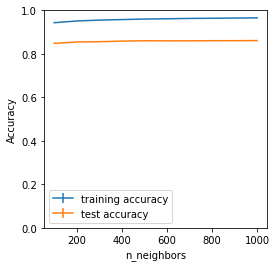

Highest Test Set Achieved = 0.861489
Best Estimator = 1000


In [81]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[100,200,300,400,500,600,700,800,900,1000]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = CatBoostRegressor(max_depth=8,
                                        n_estimators=n_neighbors,
                                    verbose=False,thread_count=-1)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Estimator = %d" %neighbors_settings[n_neighbor_best])
table.loc['catboost Estimators'] = [np.amax(lahat_train.mean(axis=1)),
                                             np.amax(lahat_test.mean(axis=1)),
                                             neighbors_settings[n_neighbor_best]]


Iter: 5: 100%|██████████| 65/65 [06:52<00:00,  6.34s/it]


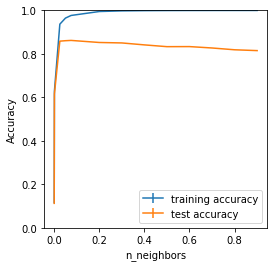

Highest Test Set Achieved = 0.862193
Best learning rate =  0.075


In [82]:
X = table2.drop('Amount',axis=1)
y = table2['Amount']
yz=5

neighbors_settings=[0.0001,0.001,0.025,0.05,0.075,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
lahat_train = pd.DataFrame()
lahat_test = pd.DataFrame()

with tqdm(total=yz*len(neighbors_settings)) as pb:
    for seedN in range(0,yz):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.25, random_state=seedN)

        training_accuracy = []
        test_accuracy = []

        pb.set_description(f'Iter: {seedN+1}')
        
        
        for n_neighbors in neighbors_settings:   
            clf = CatBoostRegressor(max_depth=8,
                                        n_estimators=1000,
                                            learning_rate=n_neighbors,verbose=False)  # build the model
            clf.fit(X_train, y_train)

            training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
            
            pb.update(1)
            
        lahat_train[seedN]= training_accuracy
        lahat_test[seedN] = test_accuracy
        
fig = plt.figure(figsize=(4,4))
plt.errorbar(neighbors_settings, lahat_train.mean(axis=1),
             yerr=lahat_train.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.legend()
plt.show()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1))
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best learning rate = ",neighbors_settings[n_neighbor_best])
table.loc['Catboostlearning rate'] = [np.amax(lahat_train.mean(axis=1)),
                                                np.amax(lahat_test.mean(axis=1)), 
                                                neighbors_settings[n_neighbor_best]]


In [83]:
table

,Train_Accuracy,Test_Accuracy,Optimal Parameter
KNN,0.999933,0.654569,7
LR,0.620925,0.632747,N/A
Ridge,0.620925,0.632771,3
Lasso,0.620925,0.632747,5
DecisionTree,0.999971,0.772066,7
RandomForest Depth,0.977639,0.853575,15
RandomForest Estimators,0.974784,0.854108,500
ExtraTreesRegressor Depth,0.998567,0.855184,17
ExtraTreesRegressor Estimator,0.995550,0.855298,900
Gradient Boosting Depth,0.999971,0.854964,6


In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


X = table2.drop(['Amount'],axis=1)
y = table2['Amount']

yz=5
lra=[]
lasa=[]
rida=[]
knna=[]
dta=[]
rfa= []
gbma = []
vma = []
etm = []
srm = []
brm = []
xgb = []
lbm = []
cat = []

lrae=[]
lasae=[]
ridae=[]
knnae=[]
dtae=[]
rfae= []
gbmae = []
vmae = []
etme = []
srme = []
brme = []
xgbe = []
lbme = []
cate = []

lrlist=[]
laslist=[]
ridlist=[]
knnlist=[]
dtlist=[]
rflist = []
gbmlist = []
vmalist = []
etmlist = []
srmlist = []
brmlist = []
xgblist = []
lbmlist = []
catlist = []




with tqdm(total=len(range(0,yz))) as pb:
    for trials in range(0,yz):
        from sklearn.model_selection import train_test_split 
        
        X = table2.drop(['Amount'],axis=1)
        y = table2['Amount']

        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=trials)
        pb.set_description(f'Iter: {trials+1}')
        from sklearn.linear_model import LinearRegression
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import Ridge
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import VotingRegressor
        from sklearn.ensemble import ExtraTreesRegressor
        from sklearn.ensemble import StackingRegressor
        from sklearn.ensemble import BaggingRegressor
        
        from xgboost import XGBRegressor
        from catboost import CatBoostRegressor
        from lightgbm import LGBMRegressor
        
        X=X_test
        y=y_test
        
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        LR_mse = mean_squared_error(y,LR.predict(X))
        LR_rmse = mean_squared_error(y,LR.predict(X),squared=False)
        LR_mae = mean_absolute_error(y,LR.predict(X))
        LR_me = max_error(y,LR.predict(X))
        LR_evs = explained_variance_score(y,LR.predict(X))

        LR_medae = median_absolute_error(y,LR.predict(X))
        
        
        Lasso = Lasso(alpha=5,max_iter=1000)
        Lasso.fit(X_train, y_train)
        Lasso_mse = mean_squared_error(y,Lasso.predict(X))
        Lasso_rmse = mean_squared_error(y,Lasso.predict(X),squared=False)
        Lasso_mae = mean_absolute_error(y,Lasso.predict(X))
        Lasso_me = max_error(y,Lasso.predict(X))
        Lasso_evs = explained_variance_score(y,Lasso.predict(X))

        Lasso_medae = median_absolute_error(y,Lasso.predict(X))
        
        
        
        
        Ridge1 = Ridge(alpha=3)
        Ridge1.fit(X_train, y_train)
        Ridge1_mse = mean_squared_error(y,Ridge1.predict(X))
        Ridge1_rmse = mean_squared_error(y,Ridge1.predict(X),squared=False)
        Ridge1_mae = mean_absolute_error(y,Ridge1.predict(X))
        Ridge1_me = max_error(y,Ridge1.predict(X))
        Ridge1_evs = explained_variance_score(y,Ridge1.predict(X))
   
        Ridge1_medae = median_absolute_error(y,Ridge1.predict(X))
        
        

        kNN = KNeighborsRegressor(n_neighbors=7) 
        kNN.fit(X_train,y_train)
        kNN_mse = mean_squared_error(y,kNN.predict(X))
        kNN_rmse = mean_squared_error(y,kNN.predict(X),squared=False)
        kNN_mae = mean_absolute_error(y,kNN.predict(X))
        kNN_me = max_error(y,kNN.predict(X))
        kNN_evs = explained_variance_score(y,kNN.predict(X))

        kNN_medae = median_absolute_error(y,kNN.predict(X))
        
        
        

        DT = DecisionTreeRegressor(max_depth=7) 
        DT.fit(X_train,y_train)
        DT_mse = mean_squared_error(y,DT.predict(X))
        DT_rmse = mean_squared_error(y,DT.predict(X),squared=False)
        DT_mae = mean_absolute_error(y,DT.predict(X))
        DT_me = max_error(y,DT.predict(X))
        DT_evs = explained_variance_score(y,DT.predict(X))
    
        DT_medae = median_absolute_error(y,DT.predict(X))
        

        RF = RandomForestRegressor(max_depth=15,n_estimators=500,n_jobs=-1) 
        RF.fit(X_train,y_train)
        RF_mse = mean_squared_error(y,RF.predict(X))
        RF_rmse = mean_squared_error(y,RF.predict(X),squared=False)
        RF_mae = mean_absolute_error(y,RF.predict(X))
        RF_me = max_error(y,RF.predict(X))
        RF_evs = explained_variance_score(y,RF.predict(X))

        RF_medae = median_absolute_error(y,RF.predict(X))

        GBM = GradientBoostingRegressor(max_depth=6,n_estimators=400,learning_rate=0.075)
        GBM.fit(X_train,y_train)
        GBM_mse = mean_squared_error(y,GBM.predict(X))
        GBM_rmse = mean_squared_error(y,GBM.predict(X),squared=False)
        GBM_mae = mean_absolute_error(y,GBM.predict(X))
        GBM_me = max_error(y,GBM.predict(X))
        GBM_evs = explained_variance_score(y,GBM.predict(X))
    
        GBM_medae = median_absolute_error(y,GBM.predict(X))
        
        
        reg1 = GradientBoostingRegressor(max_depth=6,n_estimators=400,learning_rate=0.075) 
        reg2 = CatBoostRegressor(verbose=False,max_depth=8,n_estimators=1000,learning_rate=0.075) 
   
        reg = VotingRegressor(estimators=[('gb', reg1),('cat', reg2)],n_jobs=-1)
        reg.fit(X_train, y_train)
        
        reg_mse = mean_squared_error(y,reg.predict(X))
        reg_rmse = mean_squared_error(y,reg.predict(X),squared=False)
        reg_mae = mean_absolute_error(y,reg.predict(X))
        reg_me = max_error(y,reg.predict(X))
        reg_evs = explained_variance_score(y,reg.predict(X))

        reg_medae = median_absolute_error(y,reg.predict(X))

        et = ExtraTreesRegressor(max_depth=17,n_estimators=900,n_jobs=-1) 
        et.fit(X_train,y_train)
        et_mse = mean_squared_error(y,et.predict(X))
        et_rmse = mean_squared_error(y,et.predict(X),squared=False)
        et_mae = mean_absolute_error(y,et.predict(X))
        et_me = max_error(y,et.predict(X))
        et_evs = explained_variance_score(y,et.predict(X))
      
        et_medae = median_absolute_error(y,et.predict(X))
        
        
        sr = StackingRegressor(estimators=[('gb', reg1),('cat', reg2)],
                               final_estimator=CatBoostRegressor(verbose=False,
                                                                 max_depth=8,n_estimators=1000,learning_rate=0.075))
        sr.fit(X_train,y_train)
        sr_mse = mean_squared_error(y,sr.predict(X))
        sr_rmse = mean_squared_error(y,sr.predict(X),squared=False)
        sr_mae = mean_absolute_error(y,sr.predict(X))
        sr_me = max_error(y,sr.predict(X))
        sr_evs = explained_variance_score(y,sr.predict(X))

        sr_medae = median_absolute_error(y,sr.predict(X))
        
        
        br = BaggingRegressor(base_estimator=CatBoostRegressor(verbose=False,
                                                               max_depth=8,n_estimators=1000,learning_rate=0.075))
        br.fit(X_train,y_train)
        br_mse = mean_squared_error(y,br.predict(X))
        br_rmse = mean_squared_error(y,br.predict(X),squared=False)
        br_mae = mean_absolute_error(y,br.predict(X))
        br_me = max_error(y,br.predict(X))
        br_evs = explained_variance_score(y,br.predict(X))
       
        br_medae = median_absolute_error(y,br.predict(X))
        
        xg = XGBRegressor(max_depth=4,n_estimators=400,learning_rate=0.2,n_jobs=-1)
        xg.fit(X_train,y_train)
        xg_mse = mean_squared_error(y,xg.predict(X))
        xg_rmse = mean_squared_error(y,xg.predict(X),squared=False)
        xg_mae = mean_absolute_error(y,xg.predict(X))
        xg_me = max_error(y,xg.predict(X))
        xg_evs = explained_variance_score(y,xg.predict(X))
 
        xg_medae = median_absolute_error(y,xg.predict(X))
        
        lb = LGBMRegressor(max_depth=14,n_estimators=300,learning_rate=0.05,n_jobs=-1)
        lb.fit(X_train,y_train)
        lb_mse = mean_squared_error(y,lb.predict(X))
        lb_rmse = mean_squared_error(y,lb.predict(X),squared=False)
        lb_mae = mean_absolute_error(y,lb.predict(X))
        lb_me = max_error(y,lb.predict(X))
        lb_evs = explained_variance_score(y,lb.predict(X))
       
        lb_medae = median_absolute_error(y,lb.predict(X))
        
        
        catb = CatBoostRegressor(verbose=False,max_depth=8,n_estimators=1000,learning_rate=0.075)
        catb.fit(X_train,y_train)
        catb_mse = mean_squared_error(y,catb.predict(X))
        catb_rmse = mean_squared_error(y,catb.predict(X),squared=False)
        catb_mae = mean_absolute_error(y,catb.predict(X))
        catb_me = max_error(y,catb.predict(X))
        catb_evs = explained_variance_score(y,catb.predict(X))
        
        catb_medae = median_absolute_error(y,catb.predict(X))
        
        lrae.append([LR_mse,LR_rmse,LR_mae,LR_me,LR_evs,LR_medae])
        lasae.append([Lasso_mse,Lasso_rmse,Lasso_mae,Lasso_me,Lasso_evs,Lasso_medae])
        ridae.append([Ridge1_mse,Ridge1_rmse,Ridge1_mae,Ridge1_me,Ridge1_evs,Ridge1_medae])
        knnae.append([kNN_mse,kNN_rmse,kNN_mae,kNN_me,kNN_evs,kNN_medae])
        dtae.append([DT_mse,DT_rmse,DT_mae,DT_me,DT_evs,DT_medae])
        rfae.append([RF_mse,RF_rmse,RF_mae,RF_me,RF_evs,RF_medae])
        gbmae.append([GBM_mse,GBM_rmse,GBM_mae,GBM_me,GBM_evs,GBM_medae])
        vmae.append([reg_mse,reg_rmse,reg_mae,reg_me,reg_evs,reg_medae])
        etme.append([et_mse,et_rmse,et_mae,et_me,et_evs,et_medae])
        srme.append([sr_mse,sr_rmse,sr_mae,sr_me,sr_evs,sr_medae])
        brme.append([br_mse,br_rmse,br_mae,br_me,br_evs,br_medae])
        xgbe.append([xg_mse,xg_rmse,xg_mae,xg_me,xg_evs,xg_medae])
        lbme.append([lb_mse,lb_rmse,lb_mae,lb_me,lb_evs,lb_medae])
        cate.append([catb_mse,catb_rmse,catb_mae,catb_me,catb_evs,catb_medae])
        
        lra.append(LR.score(X_train, y_train))
        lasa.append(Lasso.score(X_train, y_train))
        rida.append(Ridge1.score(X_train, y_train))
        knna.append(Ridge1.score(X_train, y_train))
        dta.append(DT.score(X_train, y_train))
        rfa.append(RF.score(X_train, y_train))
        gbma.append(GBM.score(X_train, y_train))
        vma.append(reg.score(X_train, y_train))
        etm.append(et.score(X_train, y_train))
        srm.append(sr.score(X_train, y_train))
        brm.append(br.score(X_train, y_train))
        xgb.append(xg.score(X_train, y_train))
        lbm.append(lb.score(X_train, y_train))
        cat.append(catb.score(X_train, y_train))
        
        lrlist.append(LR.score(X_test, y_test))
        laslist.append(Lasso.score(X_test, y_test))
        ridlist.append(Ridge1.score(X_test, y_test))
        knnlist.append(Ridge1.score(X_test, y_test))
        dtlist.append(DT.score(X_test, y_test))
        rflist.append(RF.score(X_test, y_test))
        gbmlist.append(GBM.score(X_test, y_test))
        vmalist.append(reg.score(X_test, y_test))
        etmlist.append(et.score(X_test, y_test))
        srmlist.append(sr.score(X_test, y_test))
        brmlist.append(br.score(X_test, y_test))
        xgblist.append(xg.score(X_test, y_test))
        lbmlist.append(lb.score(X_test, y_test))
        catlist.append(catb.score(X_test, y_test))
        pb.update(1)
        
cols = ['Method','Train Accuracy', 'Test Accuracy']
pf = pd.DataFrame(columns=cols)
pf.loc[0] = ['Linear Regression',np.array(lra).mean(), np.array(lrlist).mean()]
pf.loc[1] = ['Lasso',np.array(lasa).mean(), np.array(laslist).mean()]
pf.loc[2] = ['Ridge',np.array(rida).mean(), np.array(ridlist).mean()]
pf.loc[3] = ['KNN',np.array(knna).mean(), np.array(knnlist).mean()]
pf.loc[4] = ['Decision Tree',np.array(dta).mean(), np.array(dtlist).mean()]
pf.loc[5] = ['Random Forest',np.array(rfa).mean(), np.array(rflist).mean()]
pf.loc[6] = ['Gradient Boosting Method',np.array(gbma).mean(), np.array(gbmlist).mean()]
pf.loc[7] = ['Voting Regressor',np.array(vma).mean(), np.array(vmalist).mean()]
pf.loc[8] = ['Extra Trees',np.array(etm).mean(), np.array(etmlist).mean()]
pf.loc[9] = ['Stracking Regressor',np.array(srm).mean(), np.array(srmlist).mean()]
pf.loc[10] = ['Bagging Regressor',np.array(brm).mean(), np.array(brmlist).mean()]
pf.loc[11] = ['XGB',np.array(xgb).mean(), np.array(xgblist).mean()]
pf.loc[12] = ['Light',np.array(lbm).mean(), np.array(lbmlist).mean()]
pf.loc[13] = ['Catboost',np.array(cat).mean(), np.array(catlist).mean()]

cols1 = ['MSE','RMSE','MAE','ME','EVS','MEDAE']
pf1 = pd.DataFrame(columns=cols1)
pf1.loc['Linear Regression']= (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Lasso'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Ridge'] = (np.array([ridae]).mean(axis=1)).tolist()[0]
pf1.loc['KNN'] = (np.array([knnae]).mean(axis=1)).tolist()[0]
pf1.loc['Decision Tree'] = (np.array([dtae]).mean(axis=1)).tolist()[0]
pf1.loc['Random Forest'] = (np.array([rfae]).mean(axis=1)).tolist()[0]
pf1.loc['Gradient Boosting Method'] = (np.array([gbmae]).mean(axis=1)).tolist()[0]
pf1.loc['Voting Regressor'] = (np.array([vmae]).mean(axis=1)).tolist()[0]
pf1.loc['Extra Trees'] = (np.array([etme]).mean(axis=1)).tolist()[0]
pf1.loc['Stracking Regressor'] = (np.array([srme]).mean(axis=1)).tolist()[0]
pf1.loc['Bagging Regressor']= (np.array([brme]).mean(axis=1)).tolist()[0]
pf1.loc['XGB'] = (np.array([xgbe]).mean(axis=1)).tolist()[0]
pf1.loc['Light'] = (np.array([lbme]).mean(axis=1)).tolist()[0]
pf1.loc['Catboost'] = (np.array([cate]).mean(axis=1)).tolist()[0]

pf3 = pd.merge(pf,pf1,left_on = 'Method',right_on= pf1.index)
pf3['MSE'] = pf3['MSE'].map('₱{:,.4f}'.format)
pf3['RMSE'] = pf3['RMSE'].map('₱{:,.4f}'.format)
pf3['MAE'] = pf3['MAE'].map('₱{:,.4f}'.format)
pf3['ME'] = pf3['ME'].map('₱{:,.4f}'.format)
pf3['MEDAE'] = pf3['MEDAE'].map('₱{:,.4f}'.format)
pf3

Iter: 5: 100%|██████████| 5/5 [12:15<00:00, 147.08s/it]


,Method,Train Accuracy,Test Accuracy,MSE,RMSE,MAE,ME,EVS,MEDAE
0,Linear Regression,0.620925,0.632747,"₱13,066,568,147,963.1152","₱3,614,117.9357","₱2,478,159.3674","₱22,331,839.4384",0.633208,"₱1,672,233.9674"
1,Lasso,0.620925,0.632747,"₱13,066,568,147,963.1152","₱3,614,117.9357","₱2,478,159.3674","₱22,331,839.4384",0.633208,"₱1,672,233.9674"
2,Ridge,0.620886,0.632771,"₱13,065,577,788,075.2031","₱3,613,992.2247","₱2,477,310.4293","₱22,328,386.3855",0.633236,"₱1,669,596.8090"
3,KNN,0.620886,0.632771,"₱12,254,971,093,949.9648","₱3,500,258.8754","₱2,286,374.8394","₱21,329,613.7143",0.655852,"₱1,366,370.8571"
4,Decision Tree,0.834239,0.763779,"₱8,399,694,564,754.6064","₱2,897,712.0835","₱1,777,372.3017","₱21,945,097.2533",0.763866,"₱1,012,684.5411"
5,Random Forest,0.974574,0.853718,"₱5,205,488,511,977.3799","₱2,280,287.1952","₱1,374,378.5199","₱19,158,453.3476",0.853858,"₱758,274.3101"
6,Gradient Boosting Method,0.982116,0.858381,"₱5,041,163,634,635.0137","₱2,244,257.7092","₱1,356,469.7855","₱21,510,003.2842",0.858552,"₱778,085.0968"
7,Voting Regressor,0.980590,0.865414,"₱4,790,068,232,914.6777","₱2,187,539.0565","₱1,326,396.2179","₱20,136,370.9315",0.865533,"₱765,986.5543"
8,Extra Trees,0.995392,0.854987,"₱5,158,757,863,731.6387","₱2,270,264.5714","₱1,347,036.6897","₱20,410,010.3550",0.855123,"₱728,799.9342"
9,Stracking Regressor,0.967275,0.841758,"₱5,626,364,123,204.4561","₱2,371,449.7176","₱1,418,502.7741","₱22,090,986.9853",0.841900,"₱800,764.6524"


In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


X = table2.drop(['Amount'],axis=1)
y = table2['Amount']

yz=1
lra=[]
lasa=[]
rida=[]
knna=[]
dta=[]
rfa= []
gbma = []
vma = []
etm = []
srm = []
brm = []
xgb = []
lbm = []
cat = []

lrae=[]
lasae=[]
ridae=[]
knnae=[]
dtae=[]
rfae= []
gbmae = []
vmae = []
etme = []
srme = []
brme = []
xgbe = []
lbme = []
cate = []

lrlist=[]
laslist=[]
ridlist=[]
knnlist=[]
dtlist=[]
rflist = []
gbmlist = []
vmalist = []
etmlist = []
srmlist = []
brmlist = []
xgblist = []
lbmlist = []
catlist = []




with tqdm(total=len(range(0,yz))) as pb:
    for trials in range(0,yz):
        from sklearn.model_selection import train_test_split 
        
        X = table2.drop(['Amount'],axis=1)
        y = table2['Amount']
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=trials)
        pb.set_description(f'Iter: {trials+1}')
        from sklearn.linear_model import LinearRegression
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import Ridge
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import VotingRegressor
        from sklearn.ensemble import ExtraTreesRegressor
        from sklearn.ensemble import StackingRegressor
        from sklearn.ensemble import BaggingRegressor
        
        from xgboost import XGBRegressor
        from catboost import CatBoostRegressor
        from lightgbm import LGBMRegressor
        
        X=X_test
        y=y_test
        
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        LR_mse = mean_squared_error(y,LR.predict(X))
        LR_rmse = mean_squared_error(y,LR.predict(X),squared=False)
        LR_mae = mean_absolute_error(y,LR.predict(X))
        LR_me = max_error(y,LR.predict(X))
        LR_evs = explained_variance_score(y,LR.predict(X))

        LR_medae = median_absolute_error(y,LR.predict(X))
        
        
        Lasso = Lasso()
        Lasso.fit(X_train, y_train)
        Lasso_mse = mean_squared_error(y,Lasso.predict(X))
        Lasso_rmse = mean_squared_error(y,Lasso.predict(X),squared=False)
        Lasso_mae = mean_absolute_error(y,Lasso.predict(X))
        Lasso_me = max_error(y,Lasso.predict(X))
        Lasso_evs = explained_variance_score(y,Lasso.predict(X))

        Lasso_medae = median_absolute_error(y,Lasso.predict(X))
        
        
        
        
        Ridge1 = Ridge()
        Ridge1.fit(X_train, y_train)
        Ridge1_mse = mean_squared_error(y,Ridge1.predict(X))
        Ridge1_rmse = mean_squared_error(y,Ridge1.predict(X),squared=False)
        Ridge1_mae = mean_absolute_error(y,Ridge1.predict(X))
        Ridge1_me = max_error(y,Ridge1.predict(X))
        Ridge1_evs = explained_variance_score(y,Ridge1.predict(X))
   
        Ridge1_medae = median_absolute_error(y,Ridge1.predict(X))
        
        

        kNN = KNeighborsRegressor() 
        kNN.fit(X_train,y_train)
        kNN_mse = mean_squared_error(y,kNN.predict(X))
        kNN_rmse = mean_squared_error(y,kNN.predict(X),squared=False)
        kNN_mae = mean_absolute_error(y,kNN.predict(X))
        kNN_me = max_error(y,kNN.predict(X))
        kNN_evs = explained_variance_score(y,kNN.predict(X))

        kNN_medae = median_absolute_error(y,kNN.predict(X))
        
        
        

        DT = DecisionTreeRegressor() 
        DT.fit(X_train,y_train)
        DT_mse = mean_squared_error(y,DT.predict(X))
        DT_rmse = mean_squared_error(y,DT.predict(X),squared=False)
        DT_mae = mean_absolute_error(y,DT.predict(X))
        DT_me = max_error(y,DT.predict(X))
        DT_evs = explained_variance_score(y,DT.predict(X))
    
        DT_medae = median_absolute_error(y,DT.predict(X))
        

        RF = RandomForestRegressor() 
        RF.fit(X_train,y_train)
        RF_mse = mean_squared_error(y,RF.predict(X))
        RF_rmse = mean_squared_error(y,RF.predict(X),squared=False)
        RF_mae = mean_absolute_error(y,RF.predict(X))
        RF_me = max_error(y,RF.predict(X))
        RF_evs = explained_variance_score(y,RF.predict(X))

        RF_medae = median_absolute_error(y,RF.predict(X))

        GBM = GradientBoostingRegressor()
        GBM.fit(X_train,y_train)
        GBM_mse = mean_squared_error(y,GBM.predict(X))
        GBM_rmse = mean_squared_error(y,GBM.predict(X),squared=False)
        GBM_mae = mean_absolute_error(y,GBM.predict(X))
        GBM_me = max_error(y,GBM.predict(X))
        GBM_evs = explained_variance_score(y,GBM.predict(X))
    
        GBM_medae = median_absolute_error(y,GBM.predict(X))
        
        
        reg1 = GradientBoostingRegressor(max_depth=10,n_estimators=48) 
        reg2 = CatBoostRegressor(verbose=False,max_depth=10,n_estimators=48) 
   
        reg = VotingRegressor(estimators=[('gb', reg1),('cat', reg2)])
        reg.fit(X_train, y_train)
        
        reg_mse = mean_squared_error(y,reg.predict(X))
        reg_rmse = mean_squared_error(y,reg.predict(X),squared=False)
        reg_mae = mean_absolute_error(y,reg.predict(X))
        reg_me = max_error(y,reg.predict(X))
        reg_evs = explained_variance_score(y,reg.predict(X))

        reg_medae = median_absolute_error(y,reg.predict(X))

        et = ExtraTreesRegressor() 
        et.fit(X_train,y_train)
        et_mse = mean_squared_error(y,et.predict(X))
        et_rmse = mean_squared_error(y,et.predict(X),squared=False)
        et_mae = mean_absolute_error(y,et.predict(X))
        et_me = max_error(y,et.predict(X))
        et_evs = explained_variance_score(y,et.predict(X))
      
        et_medae = median_absolute_error(y,et.predict(X))
        
        
        sr = StackingRegressor(estimators=[('gb', reg1),('cat', reg2)],final_estimator=CatBoostRegressor(verbose=False))
        sr.fit(X_train,y_train)
        sr_mse = mean_squared_error(y,sr.predict(X))
        sr_rmse = mean_squared_error(y,sr.predict(X),squared=False)
        sr_mae = mean_absolute_error(y,sr.predict(X))
        sr_me = max_error(y,sr.predict(X))
        sr_evs = explained_variance_score(y,sr.predict(X))

        sr_medae = median_absolute_error(y,sr.predict(X))
        
        
        br = BaggingRegressor(base_estimator=CatBoostRegressor(verbose=False))
        br.fit(X_train,y_train)
        br_mse = mean_squared_error(y,br.predict(X))
        br_rmse = mean_squared_error(y,br.predict(X),squared=False)
        br_mae = mean_absolute_error(y,br.predict(X))
        br_me = max_error(y,br.predict(X))
        br_evs = explained_variance_score(y,br.predict(X))
       
        br_medae = median_absolute_error(y,br.predict(X))
        
        xg = XGBRegressor()
        xg.fit(X_train,y_train)
        xg_mse = mean_squared_error(y,xg.predict(X))
        xg_rmse = mean_squared_error(y,xg.predict(X),squared=False)
        xg_mae = mean_absolute_error(y,xg.predict(X))
        xg_me = max_error(y,xg.predict(X))
        xg_evs = explained_variance_score(y,xg.predict(X))
 
        xg_medae = median_absolute_error(y,xg.predict(X))
        
        lb = LGBMRegressor()
        lb.fit(X_train,y_train)
        lb_mse = mean_squared_error(y,lb.predict(X))
        lb_rmse = mean_squared_error(y,lb.predict(X),squared=False)
        lb_mae = mean_absolute_error(y,lb.predict(X))
        lb_me = max_error(y,lb.predict(X))
        lb_evs = explained_variance_score(y,lb.predict(X))
       
        lb_medae = median_absolute_error(y,lb.predict(X))
        
        
        catb = CatBoostRegressor(verbose=False)
        catb.fit(X_train,y_train)
        catb_mse = mean_squared_error(y,catb.predict(X))
        catb_rmse = mean_squared_error(y,catb.predict(X),squared=False)
        catb_mae = mean_absolute_error(y,catb.predict(X))
        catb_me = max_error(y,catb.predict(X))
        catb_evs = explained_variance_score(y,catb.predict(X))
        
        catb_medae = median_absolute_error(y,catb.predict(X))
        
        lrae.append([LR_mse,LR_rmse,LR_mae,LR_me,LR_evs,LR_medae])
        lasae.append([Lasso_mse,Lasso_rmse,Lasso_mae,Lasso_me,Lasso_evs,Lasso_medae])
        ridae.append([Ridge1_mse,Ridge1_rmse,Ridge1_mae,Ridge1_me,Ridge1_evs,Ridge1_medae])
        knnae.append([kNN_mse,kNN_rmse,kNN_mae,kNN_me,kNN_evs,kNN_medae])
        dtae.append([DT_mse,DT_rmse,DT_mae,DT_me,DT_evs,DT_medae])
        rfae.append([RF_mse,RF_rmse,RF_mae,RF_me,RF_evs,RF_medae])
        gbmae.append([GBM_mse,GBM_rmse,GBM_mae,GBM_me,GBM_evs,GBM_medae])
        vmae.append([reg_mse,reg_rmse,reg_mae,reg_me,reg_evs,reg_medae])
        etme.append([et_mse,et_rmse,et_mae,et_me,et_evs,et_medae])
        srme.append([sr_mse,sr_rmse,sr_mae,sr_me,sr_evs,sr_medae])
        brme.append([br_mse,br_rmse,br_mae,br_me,br_evs,br_medae])
        xgbe.append([xg_mse,xg_rmse,xg_mae,xg_me,xg_evs,xg_medae])
        lbme.append([lb_mse,lb_rmse,lb_mae,lb_me,lb_evs,lb_medae])
        cate.append([catb_mse,catb_rmse,catb_mae,catb_me,catb_evs,catb_medae])
        
        lra.append(LR.score(X_train, y_train))
        lasa.append(Lasso.score(X_train, y_train))
        rida.append(Ridge1.score(X_train, y_train))
        knna.append(Ridge1.score(X_train, y_train))
        dta.append(DT.score(X_train, y_train))
        rfa.append(RF.score(X_train, y_train))
        gbma.append(GBM.score(X_train, y_train))
        vma.append(reg.score(X_train, y_train))
        etm.append(et.score(X_train, y_train))
        srm.append(sr.score(X_train, y_train))
        brm.append(br.score(X_train, y_train))
        xgb.append(xg.score(X_train, y_train))
        lbm.append(lb.score(X_train, y_train))
        cat.append(catb.score(X_train, y_train))
        
        lrlist.append(LR.score(X_test, y_test))
        laslist.append(Lasso.score(X_test, y_test))
        ridlist.append(Ridge1.score(X_test, y_test))
        knnlist.append(Ridge1.score(X_test, y_test))
        dtlist.append(DT.score(X_test, y_test))
        rflist.append(RF.score(X_test, y_test))
        gbmlist.append(GBM.score(X_test, y_test))
        vmalist.append(reg.score(X_test, y_test))
        etmlist.append(et.score(X_test, y_test))
        srmlist.append(sr.score(X_test, y_test))
        brmlist.append(br.score(X_test, y_test))
        xgblist.append(xg.score(X_test, y_test))
        lbmlist.append(lb.score(X_test, y_test))
        catlist.append(catb.score(X_test, y_test))
        pb.update(1)
        
cols = ['Method','Train Accuracy', 'Test Accuracy']
pf = pd.DataFrame(columns=cols)
pf.loc[0] = ['Linear Regression',np.array(lra).mean(), np.array(lrlist).mean()]
pf.loc[1] = ['Lasso',np.array(lasa).mean(), np.array(laslist).mean()]
pf.loc[2] = ['Ridge',np.array(rida).mean(), np.array(ridlist).mean()]
pf.loc[3] = ['KNN',np.array(knna).mean(), np.array(knnlist).mean()]
pf.loc[4] = ['Decision Tree',np.array(dta).mean(), np.array(dtlist).mean()]
pf.loc[5] = ['Random Forest',np.array(rfa).mean(), np.array(rflist).mean()]
pf.loc[6] = ['Gradient Boosting Method',np.array(gbma).mean(), np.array(gbmlist).mean()]
pf.loc[7] = ['Voting Regressor',np.array(vma).mean(), np.array(vmalist).mean()]
pf.loc[8] = ['Extra Trees',np.array(etm).mean(), np.array(etmlist).mean()]
pf.loc[9] = ['Stracking Regressor',np.array(srm).mean(), np.array(srmlist).mean()]
pf.loc[10] = ['Bagging Regressor',np.array(brm).mean(), np.array(brmlist).mean()]
pf.loc[11] = ['XGB',np.array(xgb).mean(), np.array(xgblist).mean()]
pf.loc[12] = ['Light',np.array(lbm).mean(), np.array(lbmlist).mean()]
pf.loc[13] = ['Catboost',np.array(cat).mean(), np.array(catlist).mean()]

cols1 = ['MSE','RMSE','MAE','ME','EVS','MEDAE']
pf1 = pd.DataFrame(columns=cols1)
pf1.loc['Linear Regression']= (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Lasso'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Ridge'] = (np.array([ridae]).mean(axis=1)).tolist()[0]
pf1.loc['KNN'] = (np.array([knnae]).mean(axis=1)).tolist()[0]
pf1.loc['Decision Tree'] = (np.array([dtae]).mean(axis=1)).tolist()[0]
pf1.loc['Random Forest'] = (np.array([rfae]).mean(axis=1)).tolist()[0]
pf1.loc['Gradient Boosting Method'] = (np.array([gbmae]).mean(axis=1)).tolist()[0]
pf1.loc['Voting Regressor'] = (np.array([vmae]).mean(axis=1)).tolist()[0]
pf1.loc['Extra Trees'] = (np.array([etme]).mean(axis=1)).tolist()[0]
pf1.loc['Stracking Regressor'] = (np.array([srme]).mean(axis=1)).tolist()[0]
pf1.loc['Bagging Regressor']= (np.array([brme]).mean(axis=1)).tolist()[0]
pf1.loc['XGB'] = (np.array([xgbe]).mean(axis=1)).tolist()[0]
pf1.loc['Light'] = (np.array([lbme]).mean(axis=1)).tolist()[0]
pf1.loc['Catboost'] = (np.array([cate]).mean(axis=1)).tolist()[0]

pf3 = pd.merge(pf,pf1,left_on = 'Method',right_on= pf1.index)
pf3['MSE'] = pf3['MSE'].map('₱{:,.4f}'.format)
pf3['RMSE'] = pf3['RMSE'].map('₱{:,.4f}'.format)
pf3['MAE'] = pf3['MAE'].map('₱{:,.4f}'.format)
pf3['ME'] = pf3['ME'].map('₱{:,.4f}'.format)
pf3['MEDAE'] = pf3['MEDAE'].map('₱{:,.4f}'.format)
pf3

Iter: 1: 100%|██████████| 1/1 [01:01<00:00, 61.95s/it]


,Method,Train Accuracy,Test Accuracy,MSE,RMSE,MAE,ME,EVS,MEDAE
0,Linear Regression,0.620333,0.635577,"₱12,613,551,607,554.1309","₱3,551,556.2233","₱2,449,823.5532","₱16,953,074.1094",0.635728,"₱1,684,533.0172"
1,Lasso,0.620333,0.635577,"₱12,613,551,607,554.1309","₱3,551,556.2233","₱2,449,823.5532","₱16,953,074.1094",0.635728,"₱1,684,533.0172"
2,Ridge,0.620330,0.635494,"₱12,616,417,616,504.3672","₱3,551,959.6868","₱2,450,066.7199","₱16,969,816.4956",0.635642,"₱1,675,266.3872"
3,KNN,0.620330,0.635494,"₱11,960,637,099,734.7305","₱3,458,415.4030","₱2,273,182.6922","₱17,820,000.0000",0.654443,"₱1,319,450.0000"
4,Decision Tree,0.999992,0.733808,"₱9,213,550,024,842.6660","₱3,035,383.0112","₱1,704,075.7955","₱21,388,000.0000",0.734013,"₱900,000.0000"
5,Random Forest,0.978328,0.858534,"₱4,896,483,245,181.5479","₱2,212,799.8656","₱1,365,873.3033","₱14,135,020.4500",0.858844,"₱799,649.7700"
6,Gradient Boosting Method,0.849174,0.820414,"₱6,215,880,958,141.3096","₱2,493,166.8532","₱1,634,528.2231","₱15,338,441.8736",0.820472,"₱1,062,030.4946"
7,Voting Regressor,0.979085,0.853543,"₱5,069,216,808,650.3535","₱2,251,492.1294","₱1,378,113.9082","₱15,858,006.8416",0.853620,"₱809,585.5870"
8,Extra Trees,0.999992,0.860199,"₱4,838,850,144,826.8711","₱2,199,738.6538","₱1,338,801.0599","₱12,921,934.5500",0.860709,"₱728,501.7500"
9,Stracking Regressor,0.972528,0.828227,"₱5,945,461,072,445.1699","₱2,438,331.6166","₱1,480,355.6753","₱17,209,198.3603",0.828235,"₱847,286.0677"


In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


X = table2.drop(['Amount'],axis=1)
y = table2['Amount']

yz=5
lra=[]
lasa=[]
rida=[]
knna=[]
dta=[]
rfa= []
gbma = []
vma = []
etm = []
srm = []
brm = []
xgb = []
lbm = []
cat = []

lrae=[]
lasae=[]
ridae=[]
knnae=[]
dtae=[]
rfae= []
gbmae = []
vmae = []
etme = []
srme = []
brme = []
xgbe = []
lbme = []
cate = []

lrlist=[]
laslist=[]
ridlist=[]
knnlist=[]
dtlist=[]
rflist = []
gbmlist = []
vmalist = []
etmlist = []
srmlist = []
brmlist = []
xgblist = []
lbmlist = []
catlist = []




with tqdm(total=len(range(0,yz))) as pb:
    for trials in range(0,yz):
        from sklearn.model_selection import train_test_split 
        
        X = table2.drop(['Amount'],axis=1)
        y = table2['Amount']

        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=trials)
        pb.set_description(f'Iter: {trials+1}')
        from sklearn.linear_model import LinearRegression
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import Ridge
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import VotingRegressor
        from sklearn.ensemble import ExtraTreesRegressor
        from sklearn.ensemble import StackingRegressor
        from sklearn.ensemble import BaggingRegressor
        
        from xgboost import XGBRegressor
        from catboost import CatBoostRegressor
        from lightgbm import LGBMRegressor
        
   
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        LR_mse = mean_squared_error(y,LR.predict(X))
        LR_rmse = mean_squared_error(y,LR.predict(X),squared=False)
        LR_mae = mean_absolute_error(y,LR.predict(X))
        LR_me = max_error(y,LR.predict(X))
        LR_evs = explained_variance_score(y,LR.predict(X))

        LR_medae = median_absolute_error(y,LR.predict(X))
        
        
        Lasso = Lasso(alpha=5,max_iter=1000)
        Lasso.fit(X_train, y_train)
        Lasso_mse = mean_squared_error(y,Lasso.predict(X))
        Lasso_rmse = mean_squared_error(y,Lasso.predict(X),squared=False)
        Lasso_mae = mean_absolute_error(y,Lasso.predict(X))
        Lasso_me = max_error(y,Lasso.predict(X))
        Lasso_evs = explained_variance_score(y,Lasso.predict(X))

        Lasso_medae = median_absolute_error(y,Lasso.predict(X))
        
        
        
        
        Ridge1 = Ridge(alpha=3)
        Ridge1.fit(X_train, y_train)
        Ridge1_mse = mean_squared_error(y,Ridge1.predict(X))
        Ridge1_rmse = mean_squared_error(y,Ridge1.predict(X),squared=False)
        Ridge1_mae = mean_absolute_error(y,Ridge1.predict(X))
        Ridge1_me = max_error(y,Ridge1.predict(X))
        Ridge1_evs = explained_variance_score(y,Ridge1.predict(X))
   
        Ridge1_medae = median_absolute_error(y,Ridge1.predict(X))
        
        

        kNN = KNeighborsRegressor(n_neighbors=7) 
        kNN.fit(X_train,y_train)
        kNN_mse = mean_squared_error(y,kNN.predict(X))
        kNN_rmse = mean_squared_error(y,kNN.predict(X),squared=False)
        kNN_mae = mean_absolute_error(y,kNN.predict(X))
        kNN_me = max_error(y,kNN.predict(X))
        kNN_evs = explained_variance_score(y,kNN.predict(X))

        kNN_medae = median_absolute_error(y,kNN.predict(X))
        
        
        

        DT = DecisionTreeRegressor(max_depth=7) 
        DT.fit(X_train,y_train)
        DT_mse = mean_squared_error(y,DT.predict(X))
        DT_rmse = mean_squared_error(y,DT.predict(X),squared=False)
        DT_mae = mean_absolute_error(y,DT.predict(X))
        DT_me = max_error(y,DT.predict(X))
        DT_evs = explained_variance_score(y,DT.predict(X))
    
        DT_medae = median_absolute_error(y,DT.predict(X))
        

        RF = RandomForestRegressor(max_depth=15,n_estimators=500,n_jobs=-1) 
        RF.fit(X_train,y_train)
        RF_mse = mean_squared_error(y,RF.predict(X))
        RF_rmse = mean_squared_error(y,RF.predict(X),squared=False)
        RF_mae = mean_absolute_error(y,RF.predict(X))
        RF_me = max_error(y,RF.predict(X))
        RF_evs = explained_variance_score(y,RF.predict(X))

        RF_medae = median_absolute_error(y,RF.predict(X))

        GBM = GradientBoostingRegressor(max_depth=6,n_estimators=400,learning_rate=0.075)
        GBM.fit(X_train,y_train)
        GBM_mse = mean_squared_error(y,GBM.predict(X))
        GBM_rmse = mean_squared_error(y,GBM.predict(X),squared=False)
        GBM_mae = mean_absolute_error(y,GBM.predict(X))
        GBM_me = max_error(y,GBM.predict(X))
        GBM_evs = explained_variance_score(y,GBM.predict(X))
    
        GBM_medae = median_absolute_error(y,GBM.predict(X))
        
        
        reg1 = GradientBoostingRegressor(max_depth=6,n_estimators=400,learning_rate=0.075) 
        reg2 = CatBoostRegressor(verbose=False,max_depth=8,n_estimators=1000,learning_rate=0.075) 
   
        reg = VotingRegressor(estimators=[('gb', reg1),('cat', reg2)],n_jobs=-1)
        reg.fit(X_train, y_train)
        
        reg_mse = mean_squared_error(y,reg.predict(X))
        reg_rmse = mean_squared_error(y,reg.predict(X),squared=False)
        reg_mae = mean_absolute_error(y,reg.predict(X))
        reg_me = max_error(y,reg.predict(X))
        reg_evs = explained_variance_score(y,reg.predict(X))

        reg_medae = median_absolute_error(y,reg.predict(X))

        et = ExtraTreesRegressor(max_depth=17,n_estimators=900,n_jobs=-1) 
        et.fit(X_train,y_train)
        et_mse = mean_squared_error(y,et.predict(X))
        et_rmse = mean_squared_error(y,et.predict(X),squared=False)
        et_mae = mean_absolute_error(y,et.predict(X))
        et_me = max_error(y,et.predict(X))
        et_evs = explained_variance_score(y,et.predict(X))
      
        et_medae = median_absolute_error(y,et.predict(X))
        
        
        sr = StackingRegressor(estimators=[('gb', reg1),('cat', reg2)],
                               final_estimator=CatBoostRegressor(verbose=False,
                                                                 max_depth=8,n_estimators=1000,learning_rate=0.075))
        sr.fit(X_train,y_train)
        sr_mse = mean_squared_error(y,sr.predict(X))
        sr_rmse = mean_squared_error(y,sr.predict(X),squared=False)
        sr_mae = mean_absolute_error(y,sr.predict(X))
        sr_me = max_error(y,sr.predict(X))
        sr_evs = explained_variance_score(y,sr.predict(X))

        sr_medae = median_absolute_error(y,sr.predict(X))
        
        
        br = BaggingRegressor(base_estimator=CatBoostRegressor(verbose=False,
                                                               max_depth=8,n_estimators=1000,learning_rate=0.075))
        br.fit(X_train,y_train)
        br_mse = mean_squared_error(y,br.predict(X))
        br_rmse = mean_squared_error(y,br.predict(X),squared=False)
        br_mae = mean_absolute_error(y,br.predict(X))
        br_me = max_error(y,br.predict(X))
        br_evs = explained_variance_score(y,br.predict(X))
       
        br_medae = median_absolute_error(y,br.predict(X))
        
        xg = XGBRegressor(max_depth=4,n_estimators=400,learning_rate=0.2,n_jobs=-1)
        xg.fit(X_train,y_train)
        xg_mse = mean_squared_error(y,xg.predict(X))
        xg_rmse = mean_squared_error(y,xg.predict(X),squared=False)
        xg_mae = mean_absolute_error(y,xg.predict(X))
        xg_me = max_error(y,xg.predict(X))
        xg_evs = explained_variance_score(y,xg.predict(X))
 
        xg_medae = median_absolute_error(y,xg.predict(X))
        
        lb = LGBMRegressor(max_depth=14,n_estimators=300,learning_rate=0.05,n_jobs=-1)
        lb.fit(X_train,y_train)
        lb_mse = mean_squared_error(y,lb.predict(X))
        lb_rmse = mean_squared_error(y,lb.predict(X),squared=False)
        lb_mae = mean_absolute_error(y,lb.predict(X))
        lb_me = max_error(y,lb.predict(X))
        lb_evs = explained_variance_score(y,lb.predict(X))
       
        lb_medae = median_absolute_error(y,lb.predict(X))
        
        
        catb = CatBoostRegressor(verbose=False,max_depth=8,n_estimators=1000,learning_rate=0.075)
        catb.fit(X_train,y_train)
        catb_mse = mean_squared_error(y,catb.predict(X))
        catb_rmse = mean_squared_error(y,catb.predict(X),squared=False)
        catb_mae = mean_absolute_error(y,catb.predict(X))
        catb_me = max_error(y,catb.predict(X))
        catb_evs = explained_variance_score(y,catb.predict(X))
        
        catb_medae = median_absolute_error(y,catb.predict(X))
        
        lrae.append([LR_mse,LR_rmse,LR_mae,LR_me,LR_evs,LR_medae])
        lasae.append([Lasso_mse,Lasso_rmse,Lasso_mae,Lasso_me,Lasso_evs,Lasso_medae])
        ridae.append([Ridge1_mse,Ridge1_rmse,Ridge1_mae,Ridge1_me,Ridge1_evs,Ridge1_medae])
        knnae.append([kNN_mse,kNN_rmse,kNN_mae,kNN_me,kNN_evs,kNN_medae])
        dtae.append([DT_mse,DT_rmse,DT_mae,DT_me,DT_evs,DT_medae])
        rfae.append([RF_mse,RF_rmse,RF_mae,RF_me,RF_evs,RF_medae])
        gbmae.append([GBM_mse,GBM_rmse,GBM_mae,GBM_me,GBM_evs,GBM_medae])
        vmae.append([reg_mse,reg_rmse,reg_mae,reg_me,reg_evs,reg_medae])
        etme.append([et_mse,et_rmse,et_mae,et_me,et_evs,et_medae])
        srme.append([sr_mse,sr_rmse,sr_mae,sr_me,sr_evs,sr_medae])
        brme.append([br_mse,br_rmse,br_mae,br_me,br_evs,br_medae])
        xgbe.append([xg_mse,xg_rmse,xg_mae,xg_me,xg_evs,xg_medae])
        lbme.append([lb_mse,lb_rmse,lb_mae,lb_me,lb_evs,lb_medae])
        cate.append([catb_mse,catb_rmse,catb_mae,catb_me,catb_evs,catb_medae])
        
        lra.append(LR.score(X_train, y_train))
        lasa.append(Lasso.score(X_train, y_train))
        rida.append(Ridge1.score(X_train, y_train))
        knna.append(Ridge1.score(X_train, y_train))
        dta.append(DT.score(X_train, y_train))
        rfa.append(RF.score(X_train, y_train))
        gbma.append(GBM.score(X_train, y_train))
        vma.append(reg.score(X_train, y_train))
        etm.append(et.score(X_train, y_train))
        srm.append(sr.score(X_train, y_train))
        brm.append(br.score(X_train, y_train))
        xgb.append(xg.score(X_train, y_train))
        lbm.append(lb.score(X_train, y_train))
        cat.append(catb.score(X_train, y_train))
        
        lrlist.append(LR.score(X_test, y_test))
        laslist.append(Lasso.score(X_test, y_test))
        ridlist.append(Ridge1.score(X_test, y_test))
        knnlist.append(Ridge1.score(X_test, y_test))
        dtlist.append(DT.score(X_test, y_test))
        rflist.append(RF.score(X_test, y_test))
        gbmlist.append(GBM.score(X_test, y_test))
        vmalist.append(reg.score(X_test, y_test))
        etmlist.append(et.score(X_test, y_test))
        srmlist.append(sr.score(X_test, y_test))
        brmlist.append(br.score(X_test, y_test))
        xgblist.append(xg.score(X_test, y_test))
        lbmlist.append(lb.score(X_test, y_test))
        catlist.append(catb.score(X_test, y_test))
        pb.update(1)
        
cols = ['Method','Train Accuracy', 'Test Accuracy']
pf = pd.DataFrame(columns=cols)
pf.loc[0] = ['Linear Regression',np.array(lra).mean(), np.array(lrlist).mean()]
pf.loc[1] = ['Lasso',np.array(lasa).mean(), np.array(laslist).mean()]
pf.loc[2] = ['Ridge',np.array(rida).mean(), np.array(ridlist).mean()]
pf.loc[3] = ['KNN',np.array(knna).mean(), np.array(knnlist).mean()]
pf.loc[4] = ['Decision Tree',np.array(dta).mean(), np.array(dtlist).mean()]
pf.loc[5] = ['Random Forest',np.array(rfa).mean(), np.array(rflist).mean()]
pf.loc[6] = ['Gradient Boosting Method',np.array(gbma).mean(), np.array(gbmlist).mean()]
pf.loc[7] = ['Voting Regressor',np.array(vma).mean(), np.array(vmalist).mean()]
pf.loc[8] = ['Extra Trees',np.array(etm).mean(), np.array(etmlist).mean()]
pf.loc[9] = ['Stracking Regressor',np.array(srm).mean(), np.array(srmlist).mean()]
pf.loc[10] = ['Bagging Regressor',np.array(brm).mean(), np.array(brmlist).mean()]
pf.loc[11] = ['XGB',np.array(xgb).mean(), np.array(xgblist).mean()]
pf.loc[12] = ['Light',np.array(lbm).mean(), np.array(lbmlist).mean()]
pf.loc[13] = ['Catboost',np.array(cat).mean(), np.array(catlist).mean()]

cols1 = ['MSE','RMSE','MAE','ME','EVS','MEDAE']
pf1 = pd.DataFrame(columns=cols1)
pf1.loc['Linear Regression']= (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Lasso'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Ridge'] = (np.array([ridae]).mean(axis=1)).tolist()[0]
pf1.loc['KNN'] = (np.array([knnae]).mean(axis=1)).tolist()[0]
pf1.loc['Decision Tree'] = (np.array([dtae]).mean(axis=1)).tolist()[0]
pf1.loc['Random Forest'] = (np.array([rfae]).mean(axis=1)).tolist()[0]
pf1.loc['Gradient Boosting Method'] = (np.array([gbmae]).mean(axis=1)).tolist()[0]
pf1.loc['Voting Regressor'] = (np.array([vmae]).mean(axis=1)).tolist()[0]
pf1.loc['Extra Trees'] = (np.array([etme]).mean(axis=1)).tolist()[0]
pf1.loc['Stracking Regressor'] = (np.array([srme]).mean(axis=1)).tolist()[0]
pf1.loc['Bagging Regressor']= (np.array([brme]).mean(axis=1)).tolist()[0]
pf1.loc['XGB'] = (np.array([xgbe]).mean(axis=1)).tolist()[0]
pf1.loc['Light'] = (np.array([lbme]).mean(axis=1)).tolist()[0]
pf1.loc['Catboost'] = (np.array([cate]).mean(axis=1)).tolist()[0]

pf3 = pd.merge(pf,pf1,left_on = 'Method',right_on= pf1.index)
pf3['MSE'] = pf3['MSE'].map('₱{:,.4f}'.format)
pf3['RMSE'] = pf3['RMSE'].map('₱{:,.4f}'.format)
pf3['MAE'] = pf3['MAE'].map('₱{:,.4f}'.format)
pf3['ME'] = pf3['ME'].map('₱{:,.4f}'.format)
pf3['MEDAE'] = pf3['MEDAE'].map('₱{:,.4f}'.format)
pf3

Iter: 5: 100%|██████████| 5/5 [11:57<00:00, 143.56s/it]


,Method,Train Accuracy,Test Accuracy,MSE,RMSE,MAE,ME,EVS,MEDAE
0,Linear Regression,0.620925,0.632747,"₱12,624,480,022,182.0371","₱3,553,094.2615","₱2,435,961.8230","₱25,583,335.1114",0.624150,"₱1,653,349.1100"
1,Lasso,0.620925,0.632747,"₱12,624,480,022,182.0371","₱3,553,094.2615","₱2,435,961.8230","₱25,583,335.1114",0.624150,"₱1,653,349.1100"
2,Ridge,0.620886,0.632771,"₱12,625,194,969,889.6484","₱3,553,194.9240","₱2,435,177.6477","₱25,536,363.0166",0.624129,"₱1,648,081.2436"
3,KNN,0.620886,0.632771,"₱9,556,460,155,776.7617","₱3,091,306.9154","₱2,007,823.3369","₱23,509,091.4286",0.715559,"₱1,191,133.7857"
4,Decision Tree,0.834239,0.759951,"₱6,225,826,929,491.7246","₱2,494,862.4804","₱1,576,234.8412","₱22,433,855.1480",0.814638,"₱952,836.4989"
5,Random Forest,0.974743,0.853493,"₱1,927,066,572,299.3203","₱1,387,882.5620","₱793,588.1779","₱19,214,986.8435",0.942650,"₱448,191.2671"
6,Gradient Boosting Method,0.982116,0.858143,"₱1,704,303,206,676.3850","₱1,305,213.6393","₱754,074.3375","₱21,492,991.0277",0.949267,"₱460,594.8984"
7,Voting Regressor,0.980590,0.865410,"₱1,677,122,523,824.7688","₱1,294,802.0783","₱763,653.3573","₱20,125,339.7067",0.950073,"₱471,060.1079"
8,Extra Trees,0.995441,0.855195,"₱1,400,836,952,323.1316","₱1,183,115.8451","₱530,760.0676","₱20,349,436.9000",0.958301,"₱224,924.9825"
9,Stracking Regressor,0.967351,0.840869,"₱2,221,257,642,768.3838","₱1,490,190.2490","₱887,839.5536","₱22,719,546.8767",0.933890,"₱548,087.0239"


In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


X = table2.drop(['Amount'],axis=1)
y = table2['Amount']

yz=1
lra=[]
lasa=[]
rida=[]
knna=[]
dta=[]
rfa= []
gbma = []
vma = []
etm = []
srm = []
brm = []
xgb = []
lbm = []
cat = []

lrae=[]
lasae=[]
ridae=[]
knnae=[]
dtae=[]
rfae= []
gbmae = []
vmae = []
etme = []
srme = []
brme = []
xgbe = []
lbme = []
cate = []

lrlist=[]
laslist=[]
ridlist=[]
knnlist=[]
dtlist=[]
rflist = []
gbmlist = []
vmalist = []
etmlist = []
srmlist = []
brmlist = []
xgblist = []
lbmlist = []
catlist = []




with tqdm(total=len(range(0,yz))) as pb:
    for trials in range(0,yz):
        from sklearn.model_selection import train_test_split 
        
        X = table2.drop(['Amount'],axis=1)
        y = table2['Amount']
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=trials)
        pb.set_description(f'Iter: {trials+1}')
        from sklearn.linear_model import LinearRegression
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import Ridge
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import VotingRegressor
        from sklearn.ensemble import ExtraTreesRegressor
        from sklearn.ensemble import StackingRegressor
        from sklearn.ensemble import BaggingRegressor
        
        from xgboost import XGBRegressor
        from catboost import CatBoostRegressor
        from lightgbm import LGBMRegressor
        

        LR = LinearRegression()
        LR.fit(X_train, y_train)
        LR_mse = mean_squared_error(y,LR.predict(X))
        LR_rmse = mean_squared_error(y,LR.predict(X),squared=False)
        LR_mae = mean_absolute_error(y,LR.predict(X))
        LR_me = max_error(y,LR.predict(X))
        LR_evs = explained_variance_score(y,LR.predict(X))

        LR_medae = median_absolute_error(y,LR.predict(X))
        
        
        Lasso = Lasso()
        Lasso.fit(X_train, y_train)
        Lasso_mse = mean_squared_error(y,Lasso.predict(X))
        Lasso_rmse = mean_squared_error(y,Lasso.predict(X),squared=False)
        Lasso_mae = mean_absolute_error(y,Lasso.predict(X))
        Lasso_me = max_error(y,Lasso.predict(X))
        Lasso_evs = explained_variance_score(y,Lasso.predict(X))

        Lasso_medae = median_absolute_error(y,Lasso.predict(X))
        
        
        
        
        Ridge1 = Ridge()
        Ridge1.fit(X_train, y_train)
        Ridge1_mse = mean_squared_error(y,Ridge1.predict(X))
        Ridge1_rmse = mean_squared_error(y,Ridge1.predict(X),squared=False)
        Ridge1_mae = mean_absolute_error(y,Ridge1.predict(X))
        Ridge1_me = max_error(y,Ridge1.predict(X))
        Ridge1_evs = explained_variance_score(y,Ridge1.predict(X))
   
        Ridge1_medae = median_absolute_error(y,Ridge1.predict(X))
        
        

        kNN = KNeighborsRegressor() 
        kNN.fit(X_train,y_train)
        kNN_mse = mean_squared_error(y,kNN.predict(X))
        kNN_rmse = mean_squared_error(y,kNN.predict(X),squared=False)
        kNN_mae = mean_absolute_error(y,kNN.predict(X))
        kNN_me = max_error(y,kNN.predict(X))
        kNN_evs = explained_variance_score(y,kNN.predict(X))

        kNN_medae = median_absolute_error(y,kNN.predict(X))
        
        
        

        DT = DecisionTreeRegressor() 
        DT.fit(X_train,y_train)
        DT_mse = mean_squared_error(y,DT.predict(X))
        DT_rmse = mean_squared_error(y,DT.predict(X),squared=False)
        DT_mae = mean_absolute_error(y,DT.predict(X))
        DT_me = max_error(y,DT.predict(X))
        DT_evs = explained_variance_score(y,DT.predict(X))
    
        DT_medae = median_absolute_error(y,DT.predict(X))
        

        RF = RandomForestRegressor() 
        RF.fit(X_train,y_train)
        RF_mse = mean_squared_error(y,RF.predict(X))
        RF_rmse = mean_squared_error(y,RF.predict(X),squared=False)
        RF_mae = mean_absolute_error(y,RF.predict(X))
        RF_me = max_error(y,RF.predict(X))
        RF_evs = explained_variance_score(y,RF.predict(X))

        RF_medae = median_absolute_error(y,RF.predict(X))

        GBM = GradientBoostingRegressor()
        GBM.fit(X_train,y_train)
        GBM_mse = mean_squared_error(y,GBM.predict(X))
        GBM_rmse = mean_squared_error(y,GBM.predict(X),squared=False)
        GBM_mae = mean_absolute_error(y,GBM.predict(X))
        GBM_me = max_error(y,GBM.predict(X))
        GBM_evs = explained_variance_score(y,GBM.predict(X))
    
        GBM_medae = median_absolute_error(y,GBM.predict(X))
        
        
        reg1 = GradientBoostingRegressor(max_depth=10,n_estimators=48) 
        reg2 = CatBoostRegressor(verbose=False,max_depth=10,n_estimators=48) 
   
        reg = VotingRegressor(estimators=[('gb', reg1),('cat', reg2)])
        reg.fit(X_train, y_train)
        
        reg_mse = mean_squared_error(y,reg.predict(X))
        reg_rmse = mean_squared_error(y,reg.predict(X),squared=False)
        reg_mae = mean_absolute_error(y,reg.predict(X))
        reg_me = max_error(y,reg.predict(X))
        reg_evs = explained_variance_score(y,reg.predict(X))

        reg_medae = median_absolute_error(y,reg.predict(X))

        et = ExtraTreesRegressor() 
        et.fit(X_train,y_train)
        et_mse = mean_squared_error(y,et.predict(X))
        et_rmse = mean_squared_error(y,et.predict(X),squared=False)
        et_mae = mean_absolute_error(y,et.predict(X))
        et_me = max_error(y,et.predict(X))
        et_evs = explained_variance_score(y,et.predict(X))
      
        et_medae = median_absolute_error(y,et.predict(X))
        
        
        sr = StackingRegressor(estimators=[('gb', reg1),('cat', reg2)],final_estimator=CatBoostRegressor(verbose=False))
        sr.fit(X_train,y_train)
        sr_mse = mean_squared_error(y,sr.predict(X))
        sr_rmse = mean_squared_error(y,sr.predict(X),squared=False)
        sr_mae = mean_absolute_error(y,sr.predict(X))
        sr_me = max_error(y,sr.predict(X))
        sr_evs = explained_variance_score(y,sr.predict(X))

        sr_medae = median_absolute_error(y,sr.predict(X))
        
        
        br = BaggingRegressor(base_estimator=CatBoostRegressor(verbose=False))
        br.fit(X_train,y_train)
        br_mse = mean_squared_error(y,br.predict(X))
        br_rmse = mean_squared_error(y,br.predict(X),squared=False)
        br_mae = mean_absolute_error(y,br.predict(X))
        br_me = max_error(y,br.predict(X))
        br_evs = explained_variance_score(y,br.predict(X))
       
        br_medae = median_absolute_error(y,br.predict(X))
        
        xg = XGBRegressor()
        xg.fit(X_train,y_train)
        xg_mse = mean_squared_error(y,xg.predict(X))
        xg_rmse = mean_squared_error(y,xg.predict(X),squared=False)
        xg_mae = mean_absolute_error(y,xg.predict(X))
        xg_me = max_error(y,xg.predict(X))
        xg_evs = explained_variance_score(y,xg.predict(X))
 
        xg_medae = median_absolute_error(y,xg.predict(X))
        
        lb = LGBMRegressor()
        lb.fit(X_train,y_train)
        lb_mse = mean_squared_error(y,lb.predict(X))
        lb_rmse = mean_squared_error(y,lb.predict(X),squared=False)
        lb_mae = mean_absolute_error(y,lb.predict(X))
        lb_me = max_error(y,lb.predict(X))
        lb_evs = explained_variance_score(y,lb.predict(X))
       
        lb_medae = median_absolute_error(y,lb.predict(X))
        
        
        catb = CatBoostRegressor(verbose=False)
        catb.fit(X_train,y_train)
        catb_mse = mean_squared_error(y,catb.predict(X))
        catb_rmse = mean_squared_error(y,catb.predict(X),squared=False)
        catb_mae = mean_absolute_error(y,catb.predict(X))
        catb_me = max_error(y,catb.predict(X))
        catb_evs = explained_variance_score(y,catb.predict(X))
        
        catb_medae = median_absolute_error(y,catb.predict(X))
        
        lrae.append([LR_mse,LR_rmse,LR_mae,LR_me,LR_evs,LR_medae])
        lasae.append([Lasso_mse,Lasso_rmse,Lasso_mae,Lasso_me,Lasso_evs,Lasso_medae])
        ridae.append([Ridge1_mse,Ridge1_rmse,Ridge1_mae,Ridge1_me,Ridge1_evs,Ridge1_medae])
        knnae.append([kNN_mse,kNN_rmse,kNN_mae,kNN_me,kNN_evs,kNN_medae])
        dtae.append([DT_mse,DT_rmse,DT_mae,DT_me,DT_evs,DT_medae])
        rfae.append([RF_mse,RF_rmse,RF_mae,RF_me,RF_evs,RF_medae])
        gbmae.append([GBM_mse,GBM_rmse,GBM_mae,GBM_me,GBM_evs,GBM_medae])
        vmae.append([reg_mse,reg_rmse,reg_mae,reg_me,reg_evs,reg_medae])
        etme.append([et_mse,et_rmse,et_mae,et_me,et_evs,et_medae])
        srme.append([sr_mse,sr_rmse,sr_mae,sr_me,sr_evs,sr_medae])
        brme.append([br_mse,br_rmse,br_mae,br_me,br_evs,br_medae])
        xgbe.append([xg_mse,xg_rmse,xg_mae,xg_me,xg_evs,xg_medae])
        lbme.append([lb_mse,lb_rmse,lb_mae,lb_me,lb_evs,lb_medae])
        cate.append([catb_mse,catb_rmse,catb_mae,catb_me,catb_evs,catb_medae])
        
        lra.append(LR.score(X_train, y_train))
        lasa.append(Lasso.score(X_train, y_train))
        rida.append(Ridge1.score(X_train, y_train))
        knna.append(Ridge1.score(X_train, y_train))
        dta.append(DT.score(X_train, y_train))
        rfa.append(RF.score(X_train, y_train))
        gbma.append(GBM.score(X_train, y_train))
        vma.append(reg.score(X_train, y_train))
        etm.append(et.score(X_train, y_train))
        srm.append(sr.score(X_train, y_train))
        brm.append(br.score(X_train, y_train))
        xgb.append(xg.score(X_train, y_train))
        lbm.append(lb.score(X_train, y_train))
        cat.append(catb.score(X_train, y_train))
        
        lrlist.append(LR.score(X_test, y_test))
        laslist.append(Lasso.score(X_test, y_test))
        ridlist.append(Ridge1.score(X_test, y_test))
        knnlist.append(Ridge1.score(X_test, y_test))
        dtlist.append(DT.score(X_test, y_test))
        rflist.append(RF.score(X_test, y_test))
        gbmlist.append(GBM.score(X_test, y_test))
        vmalist.append(reg.score(X_test, y_test))
        etmlist.append(et.score(X_test, y_test))
        srmlist.append(sr.score(X_test, y_test))
        brmlist.append(br.score(X_test, y_test))
        xgblist.append(xg.score(X_test, y_test))
        lbmlist.append(lb.score(X_test, y_test))
        catlist.append(catb.score(X_test, y_test))
        pb.update(1)
        
cols = ['Method','Train Accuracy', 'Test Accuracy']
pf = pd.DataFrame(columns=cols)
pf.loc[0] = ['Linear Regression',np.array(lra).mean(), np.array(lrlist).mean()]
pf.loc[1] = ['Lasso',np.array(lasa).mean(), np.array(laslist).mean()]
pf.loc[2] = ['Ridge',np.array(rida).mean(), np.array(ridlist).mean()]
pf.loc[3] = ['KNN',np.array(knna).mean(), np.array(knnlist).mean()]
pf.loc[4] = ['Decision Tree',np.array(dta).mean(), np.array(dtlist).mean()]
pf.loc[5] = ['Random Forest',np.array(rfa).mean(), np.array(rflist).mean()]
pf.loc[6] = ['Gradient Boosting Method',np.array(gbma).mean(), np.array(gbmlist).mean()]
pf.loc[7] = ['Voting Regressor',np.array(vma).mean(), np.array(vmalist).mean()]
pf.loc[8] = ['Extra Trees',np.array(etm).mean(), np.array(etmlist).mean()]
pf.loc[9] = ['Stracking Regressor',np.array(srm).mean(), np.array(srmlist).mean()]
pf.loc[10] = ['Bagging Regressor',np.array(brm).mean(), np.array(brmlist).mean()]
pf.loc[11] = ['XGB',np.array(xgb).mean(), np.array(xgblist).mean()]
pf.loc[12] = ['Light',np.array(lbm).mean(), np.array(lbmlist).mean()]
pf.loc[13] = ['Catboost',np.array(cat).mean(), np.array(catlist).mean()]

cols1 = ['MSE','RMSE','MAE','ME','EVS','MEDAE']
pf1 = pd.DataFrame(columns=cols1)
pf1.loc['Linear Regression']= (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Lasso'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Ridge'] = (np.array([ridae]).mean(axis=1)).tolist()[0]
pf1.loc['KNN'] = (np.array([knnae]).mean(axis=1)).tolist()[0]
pf1.loc['Decision Tree'] = (np.array([dtae]).mean(axis=1)).tolist()[0]
pf1.loc['Random Forest'] = (np.array([rfae]).mean(axis=1)).tolist()[0]
pf1.loc['Gradient Boosting Method'] = (np.array([gbmae]).mean(axis=1)).tolist()[0]
pf1.loc['Voting Regressor'] = (np.array([vmae]).mean(axis=1)).tolist()[0]
pf1.loc['Extra Trees'] = (np.array([etme]).mean(axis=1)).tolist()[0]
pf1.loc['Stracking Regressor'] = (np.array([srme]).mean(axis=1)).tolist()[0]
pf1.loc['Bagging Regressor']= (np.array([brme]).mean(axis=1)).tolist()[0]
pf1.loc['XGB'] = (np.array([xgbe]).mean(axis=1)).tolist()[0]
pf1.loc['Light'] = (np.array([lbme]).mean(axis=1)).tolist()[0]
pf1.loc['Catboost'] = (np.array([cate]).mean(axis=1)).tolist()[0]

pf3 = pd.merge(pf,pf1,left_on = 'Method',right_on= pf1.index)
pf3['MSE'] = pf3['MSE'].map('₱{:,.4f}'.format)
pf3['RMSE'] = pf3['RMSE'].map('₱{:,.4f}'.format)
pf3['MAE'] = pf3['MAE'].map('₱{:,.4f}'.format)
pf3['ME'] = pf3['ME'].map('₱{:,.4f}'.format)
pf3['MEDAE'] = pf3['MEDAE'].map('₱{:,.4f}'.format)
pf3

Iter: 1: 100%|██████████| 1/1 [01:00<00:00, 60.44s/it]


,Method,Train Accuracy,Test Accuracy,MSE,RMSE,MAE,ME,EVS,MEDAE
0,Linear Regression,0.620333,0.635577,"₱12,619,142,511,835.0664","₱3,552,343.2424","₱2,436,650.7599","₱25,556,853.8252",0.624288,"₱1,652,486.4379"
1,Lasso,0.620333,0.635577,"₱12,619,142,511,835.0664","₱3,552,343.2424","₱2,436,650.7599","₱25,556,853.8252",0.624288,"₱1,652,486.4379"
2,Ridge,0.620330,0.635494,"₱12,619,941,111,676.3945","₱3,552,455.6453","₱2,436,508.5145","₱25,541,727.4013",0.624264,"₱1,655,560.2923"
3,KNN,0.620330,0.635494,"₱8,828,287,293,671.3184","₱2,971,243.3919","₱1,917,080.9757","₱20,498,648.0000",0.737161,"₱1,115,948.0000"
4,Decision Tree,0.999992,0.726909,"₱2,364,004,978,180.3003","₱1,537,532.1064","₱431,923.0040","₱21,388,000.0000",0.929642,₱0.0000
5,Random Forest,0.978485,0.858853,"₱1,758,083,772,959.1304","₱1,325,927.5142","₱718,931.4227","₱14,300,248.5900",0.947719,"₱345,262.5750"
6,Gradient Boosting Method,0.849174,0.820374,"₱5,314,770,137,307.5928","₱2,305,378.5237","₱1,525,852.4775","₱25,688,485.6977",0.841762,"₱986,638.8788"
7,Voting Regressor,0.979393,0.853664,"₱1,780,352,512,363.7393","₱1,334,298.5095","₱800,906.5731","₱15,833,617.8717",0.946998,"₱511,489.4584"
8,Extra Trees,0.999992,0.860286,"₱1,209,535,114,913.6428","₱1,099,788.6683","₱334,732.7833","₱13,791,535.4600",0.964024,₱0.0000
9,Stracking Regressor,0.969982,0.824159,"₱2,270,369,965,511.1094","₱1,506,774.6897","₱865,383.6197","₱17,224,024.3649",0.932405,"₱499,833.0227"


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


X = table2.drop(['Amount'],axis=1)
y = table2['Amount']

yz=5
lra=[]
lasa=[]
rida=[]
knna=[]
dta=[]
rfa= []
gbma = []
vma = []
etm = []
srm = []
brm = []
xgb = []
lbm = []
cat = []

lrae=[]
lasae=[]
ridae=[]
knnae=[]
dtae=[]
rfae= []
gbmae = []
vmae = []
etme = []
srme = []
brme = []
xgbe = []
lbme = []
cate = []

lrlist=[]
laslist=[]
ridlist=[]
knnlist=[]
dtlist=[]
rflist = []
gbmlist = []
vmalist = []
etmlist = []
srmlist = []
brmlist = []
xgblist = []
lbmlist = []
catlist = []




with tqdm(total=len(range(0,yz))) as pb:
    for trials in range(0,yz):
        from sklearn.model_selection import train_test_split 
        
        X = table2.drop(['Amount'],axis=1)
        y = table2['Amount']

        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=trials)
        pb.set_description(f'Iter: {trials+1}')
        from sklearn.linear_model import LinearRegression
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import Ridge
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import VotingRegressor
        from sklearn.ensemble import ExtraTreesRegressor
        from sklearn.ensemble import StackingRegressor
        from sklearn.ensemble import BaggingRegressor
        
        from xgboost import XGBRegressor
        from catboost import CatBoostRegressor
        from lightgbm import LGBMRegressor
        
   
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        LR_mse = mean_squared_error(y,LR.predict(X))
        LR_rmse = mean_squared_error(y,LR.predict(X),squared=False)
        LR_mae = mean_absolute_error(y,LR.predict(X))
        LR_me = max_error(y,LR.predict(X))
        LR_evs = explained_variance_score(y,LR.predict(X))

        LR_medae = median_absolute_error(y,LR.predict(X))
        
        
        Lasso = Lasso(alpha=5,max_iter=1000)
        Lasso.fit(X_train, y_train)
        Lasso_mse = mean_squared_error(y,Lasso.predict(X))
        Lasso_rmse = mean_squared_error(y,Lasso.predict(X),squared=False)
        Lasso_mae = mean_absolute_error(y,Lasso.predict(X))
        Lasso_me = max_error(y,Lasso.predict(X))
        Lasso_evs = explained_variance_score(y,Lasso.predict(X))

        Lasso_medae = median_absolute_error(y,Lasso.predict(X))
        
        
        
        
        Ridge1 = Ridge(alpha=3)
        Ridge1.fit(X_train, y_train)
        Ridge1_mse = mean_squared_error(y,Ridge1.predict(X))
        Ridge1_rmse = mean_squared_error(y,Ridge1.predict(X),squared=False)
        Ridge1_mae = mean_absolute_error(y,Ridge1.predict(X))
        Ridge1_me = max_error(y,Ridge1.predict(X))
        Ridge1_evs = explained_variance_score(y,Ridge1.predict(X))
   
        Ridge1_medae = median_absolute_error(y,Ridge1.predict(X))
        
        

        kNN = KNeighborsRegressor(n_neighbors=7) 
        kNN.fit(X_train,y_train)
        kNN_mse = mean_squared_error(y,kNN.predict(X))
        kNN_rmse = mean_squared_error(y,kNN.predict(X),squared=False)
        kNN_mae = mean_absolute_error(y,kNN.predict(X))
        kNN_me = max_error(y,kNN.predict(X))
        kNN_evs = explained_variance_score(y,kNN.predict(X))

        kNN_medae = median_absolute_error(y,kNN.predict(X))
        
        
        

        DT = DecisionTreeRegressor(max_depth=7) 
        DT.fit(X_train,y_train)
        DT_mse = mean_squared_error(y,DT.predict(X))
        DT_rmse = mean_squared_error(y,DT.predict(X),squared=False)
        DT_mae = mean_absolute_error(y,DT.predict(X))
        DT_me = max_error(y,DT.predict(X))
        DT_evs = explained_variance_score(y,DT.predict(X))
    
        DT_medae = median_absolute_error(y,DT.predict(X))
        

        RF = RandomForestRegressor(max_depth=15,n_estimators=500,n_jobs=-1) 
        RF.fit(X_train,y_train)
        RF_mse = mean_squared_error(y,RF.predict(X))
        RF_rmse = mean_squared_error(y,RF.predict(X),squared=False)
        RF_mae = mean_absolute_error(y,RF.predict(X))
        RF_me = max_error(y,RF.predict(X))
        RF_evs = explained_variance_score(y,RF.predict(X))

        RF_medae = median_absolute_error(y,RF.predict(X))

        GBM = GradientBoostingRegressor(max_depth=6,n_estimators=400,learning_rate=0.075)
        GBM.fit(X_train,y_train)
        GBM_mse = mean_squared_error(y,GBM.predict(X))
        GBM_rmse = mean_squared_error(y,GBM.predict(X),squared=False)
        GBM_mae = mean_absolute_error(y,GBM.predict(X))
        GBM_me = max_error(y,GBM.predict(X))
        GBM_evs = explained_variance_score(y,GBM.predict(X))
    
        GBM_medae = median_absolute_error(y,GBM.predict(X))
        
        
        reg1 = GradientBoostingRegressor(max_depth=6,n_estimators=400,learning_rate=0.075) 
        reg2 = CatBoostRegressor(verbose=False,max_depth=8,n_estimators=1000,learning_rate=0.075) 
   
        reg = VotingRegressor(estimators=[('gb', reg1),('cat', reg2)],n_jobs=-1)
        reg.fit(X_train, y_train)
        
        reg_mse = mean_squared_error(y,reg.predict(X))
        reg_rmse = mean_squared_error(y,reg.predict(X),squared=False)
        reg_mae = mean_absolute_error(y,reg.predict(X))
        reg_me = max_error(y,reg.predict(X))
        reg_evs = explained_variance_score(y,reg.predict(X))

        reg_medae = median_absolute_error(y,reg.predict(X))

        et = ExtraTreesRegressor(max_depth=17,n_estimators=900,n_jobs=-1) 
        et.fit(X_train,y_train)
        et_mse = mean_squared_error(y,et.predict(X))
        et_rmse = mean_squared_error(y,et.predict(X),squared=False)
        et_mae = mean_absolute_error(y,et.predict(X))
        et_me = max_error(y,et.predict(X))
        et_evs = explained_variance_score(y,et.predict(X))
      
        et_medae = median_absolute_error(y,et.predict(X))
        
        
        sr = StackingRegressor(estimators=[('gb', reg1),('cat', reg2)],
                               final_estimator=CatBoostRegressor(verbose=False,
                                                                 max_depth=8,n_estimators=1000,learning_rate=0.075))
        sr.fit(X_train,y_train)
        sr_mse = mean_squared_error(y,sr.predict(X))
        sr_rmse = mean_squared_error(y,sr.predict(X),squared=False)
        sr_mae = mean_absolute_error(y,sr.predict(X))
        sr_me = max_error(y,sr.predict(X))
        sr_evs = explained_variance_score(y,sr.predict(X))

        sr_medae = median_absolute_error(y,sr.predict(X))
        
        
        br = BaggingRegressor(base_estimator=CatBoostRegressor(verbose=False,
                                                               max_depth=8,n_estimators=1000,learning_rate=0.075))
        br.fit(X_train,y_train)
        br_mse = mean_squared_error(y,br.predict(X))
        br_rmse = mean_squared_error(y,br.predict(X),squared=False)
        br_mae = mean_absolute_error(y,br.predict(X))
        br_me = max_error(y,br.predict(X))
        br_evs = explained_variance_score(y,br.predict(X))
       
        br_medae = median_absolute_error(y,br.predict(X))
        
        xg = XGBRegressor(max_depth=4,n_estimators=400,learning_rate=0.2,n_jobs=-1)
        xg.fit(X_train,y_train)
        xg_mse = mean_squared_error(y,xg.predict(X))
        xg_rmse = mean_squared_error(y,xg.predict(X),squared=False)
        xg_mae = mean_absolute_error(y,xg.predict(X))
        xg_me = max_error(y,xg.predict(X))
        xg_evs = explained_variance_score(y,xg.predict(X))
 
        xg_medae = median_absolute_error(y,xg.predict(X))
        
        lb = LGBMRegressor(max_depth=14,n_estimators=300,learning_rate=0.05,n_jobs=-1)
        lb.fit(X_train,y_train)
        lb_mse = mean_squared_error(y,lb.predict(X))
        lb_rmse = mean_squared_error(y,lb.predict(X),squared=False)
        lb_mae = mean_absolute_error(y,lb.predict(X))
        lb_me = max_error(y,lb.predict(X))
        lb_evs = explained_variance_score(y,lb.predict(X))
       
        lb_medae = median_absolute_error(y,lb.predict(X))
        
        
        catb = CatBoostRegressor(verbose=False,max_depth=8,n_estimators=1000,learning_rate=0.075)
        catb.fit(X_train,y_train)
        catb_mse = mean_squared_error(y,catb.predict(X))
        catb_rmse = mean_squared_error(y,catb.predict(X),squared=False)
        catb_mae = mean_absolute_error(y,catb.predict(X))
        catb_me = max_error(y,catb.predict(X))
        catb_evs = explained_variance_score(y,catb.predict(X))
        
        catb_medae = median_absolute_error(y,catb.predict(X))
        
        lrae.append([LR_mse,LR_rmse,LR_mae,LR_me,LR_evs,LR_medae])
        lasae.append([Lasso_mse,Lasso_rmse,Lasso_mae,Lasso_me,Lasso_evs,Lasso_medae])
        ridae.append([Ridge1_mse,Ridge1_rmse,Ridge1_mae,Ridge1_me,Ridge1_evs,Ridge1_medae])
        knnae.append([kNN_mse,kNN_rmse,kNN_mae,kNN_me,kNN_evs,kNN_medae])
        dtae.append([DT_mse,DT_rmse,DT_mae,DT_me,DT_evs,DT_medae])
        rfae.append([RF_mse,RF_rmse,RF_mae,RF_me,RF_evs,RF_medae])
        gbmae.append([GBM_mse,GBM_rmse,GBM_mae,GBM_me,GBM_evs,GBM_medae])
        vmae.append([reg_mse,reg_rmse,reg_mae,reg_me,reg_evs,reg_medae])
        etme.append([et_mse,et_rmse,et_mae,et_me,et_evs,et_medae])
        srme.append([sr_mse,sr_rmse,sr_mae,sr_me,sr_evs,sr_medae])
        brme.append([br_mse,br_rmse,br_mae,br_me,br_evs,br_medae])
        xgbe.append([xg_mse,xg_rmse,xg_mae,xg_me,xg_evs,xg_medae])
        lbme.append([lb_mse,lb_rmse,lb_mae,lb_me,lb_evs,lb_medae])
        cate.append([catb_mse,catb_rmse,catb_mae,catb_me,catb_evs,catb_medae])
        
        lra.append(LR.score(X_train, y_train))
        lasa.append(Lasso.score(X_train, y_train))
        rida.append(Ridge1.score(X_train, y_train))
        knna.append(Ridge1.score(X_train, y_train))
        dta.append(DT.score(X_train, y_train))
        rfa.append(RF.score(X_train, y_train))
        gbma.append(GBM.score(X_train, y_train))
        vma.append(reg.score(X_train, y_train))
        etm.append(et.score(X_train, y_train))
        srm.append(sr.score(X_train, y_train))
        brm.append(br.score(X_train, y_train))
        xgb.append(xg.score(X_train, y_train))
        lbm.append(lb.score(X_train, y_train))
        cat.append(catb.score(X_train, y_train))
        
        lrlist.append(LR.score(X_test, y_test))
        laslist.append(Lasso.score(X_test, y_test))
        ridlist.append(Ridge1.score(X_test, y_test))
        knnlist.append(Ridge1.score(X_test, y_test))
        dtlist.append(DT.score(X_test, y_test))
        rflist.append(RF.score(X_test, y_test))
        gbmlist.append(GBM.score(X_test, y_test))
        vmalist.append(reg.score(X_test, y_test))
        etmlist.append(et.score(X_test, y_test))
        srmlist.append(sr.score(X_test, y_test))
        brmlist.append(br.score(X_test, y_test))
        xgblist.append(xg.score(X_test, y_test))
        lbmlist.append(lb.score(X_test, y_test))
        catlist.append(catb.score(X_test, y_test))
        pb.update(1)
        
cols = ['Method','Train Accuracy', 'Test Accuracy']
pf = pd.DataFrame(columns=cols)
pf.loc[0] = ['Linear Regression',np.array(lra).mean(), np.array(lrlist).mean()]
pf.loc[1] = ['Lasso',np.array(lasa).mean(), np.array(laslist).mean()]
pf.loc[2] = ['Ridge',np.array(rida).mean(), np.array(ridlist).mean()]
pf.loc[3] = ['KNN',np.array(knna).mean(), np.array(knnlist).mean()]
pf.loc[4] = ['Decision Tree',np.array(dta).mean(), np.array(dtlist).mean()]
pf.loc[5] = ['Random Forest',np.array(rfa).mean(), np.array(rflist).mean()]
pf.loc[6] = ['Gradient Boosting Method',np.array(gbma).mean(), np.array(gbmlist).mean()]
pf.loc[7] = ['Voting Regressor',np.array(vma).mean(), np.array(vmalist).mean()]
pf.loc[8] = ['Extra Trees',np.array(etm).mean(), np.array(etmlist).mean()]
pf.loc[9] = ['Stracking Regressor',np.array(srm).mean(), np.array(srmlist).mean()]
pf.loc[10] = ['Bagging Regressor',np.array(brm).mean(), np.array(brmlist).mean()]
pf.loc[11] = ['XGB',np.array(xgb).mean(), np.array(xgblist).mean()]
pf.loc[12] = ['Light',np.array(lbm).mean(), np.array(lbmlist).mean()]
pf.loc[13] = ['Catboost',np.array(cat).mean(), np.array(catlist).mean()]

cols1 = ['MSE','RMSE','MAE','ME','EVS','MEDAE']
pf1 = pd.DataFrame(columns=cols1)
pf1.loc['Linear Regression']= (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Lasso'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Ridge'] = (np.array([ridae]).mean(axis=1)).tolist()[0]
pf1.loc['KNN'] = (np.array([knnae]).mean(axis=1)).tolist()[0]
pf1.loc['Decision Tree'] = (np.array([dtae]).mean(axis=1)).tolist()[0]
pf1.loc['Random Forest'] = (np.array([rfae]).mean(axis=1)).tolist()[0]
pf1.loc['Gradient Boosting Method'] = (np.array([gbmae]).mean(axis=1)).tolist()[0]
pf1.loc['Voting Regressor'] = (np.array([vmae]).mean(axis=1)).tolist()[0]
pf1.loc['Extra Trees'] = (np.array([etme]).mean(axis=1)).tolist()[0]
pf1.loc['Stracking Regressor'] = (np.array([srme]).mean(axis=1)).tolist()[0]
pf1.loc['Bagging Regressor']= (np.array([brme]).mean(axis=1)).tolist()[0]
pf1.loc['XGB'] = (np.array([xgbe]).mean(axis=1)).tolist()[0]
pf1.loc['Light'] = (np.array([lbme]).mean(axis=1)).tolist()[0]
pf1.loc['Catboost'] = (np.array([cate]).mean(axis=1)).tolist()[0]

pf3 = pd.merge(pf,pf1,left_on = 'Method',right_on= pf1.index)
pf3['MSE'] = pf3['MSE'].map('₱{:,.4f}'.format)
pf3['RMSE'] = pf3['RMSE'].map('₱{:,.4f}'.format)
pf3['MAE'] = pf3['MAE'].map('₱{:,.4f}'.format)
pf3['ME'] = pf3['ME'].map('₱{:,.4f}'.format)
pf3['MEDAE'] = pf3['MEDAE'].map('₱{:,.4f}'.format)
pf3

In [92]:
X

,City,No_of_Bedroom,No_of_Baths,Floor_Area,Latitude,L0ngitude,countnewAm,floor_number
2,5,2.0,2.0,52.000,14.558112,120.993771,17,10.0
6,12,2.0,1.0,132.390,14.603980,121.045000,4,2.0
7,11,1.0,1.0,23.000,14.651189,121.032754,24,18.0
9,4,1.0,1.0,30.260,14.572573,121.048343,33,15.0
10,9,3.0,3.0,129.000,14.582640,121.078700,93,28.0
...,...,...,...,...,...,...,...,...
14810,2,2.0,1.0,58.000,14.468350,120.969780,36,5.0
14813,4,1.0,1.0,20.010,14.574420,121.050700,20,15.0
14815,3,1.0,1.0,29.000,14.566278,121.037021,34,10.0
14818,11,2.0,2.0,92.512,14.662144,121.044309,6,30.0


In [93]:
conn = sqlite3.connect('lamudi2.db')
table_a = pd.read_sql(""" SELECT * from mytable""",conn)
table_a= table_a.drop(['GPath','Title','address','descrip','link'],axis=1)

conn1 = sqlite3.connect('lamudi3.db')
table_b = pd.read_sql(""" SELECT * from mytable""",conn1)
table_b = table_b.drop(['GPath','Title','address','descrip','link'],axis=1)
table_b

table2 = table_a.append(table_b,ignore_index=True)

In [94]:
table2.to_

,City,Amount,No_of_Bedroom,No_of_Baths,Floor_Area,Amenities,Latitude,L0ngitude,Index1
0,Makati,32500000,2,2,158,\nAmenities\n\n\n\n\n CCTV\n ...,14.56036,121.02202,DetailsCar Spaces 2Bedrooms 2Baths 2Floo...
1,Quezon City,2800000,1,None,None,\nAmenities\n\n\n\n\n CCTV\n ...,14.620208,120.99982,DetailsBedrooms 1Available from 18/08/2020
2,Manila,8500000,2,2,52,\nAmenities\n\n\n\n\n Gymnasium\n ...,14.5581118,120.9937707,DetailsBedrooms 2Baths 2Floor area (m²) ...
3,San Juan,31000000,3,3,155.81,\nAmenities\n\n\n\n\n Gymnasium\n ...,14.600676,121.43876,DetailsCar Spaces 2Bedrooms 3Baths 3Floo...
4,Makati,113900000,3,None,304,\nAmenities\n\n\n\n\n CCTV\n ...,14.555756,121.029209,DetailsCar Spaces 3Bedrooms 3Floor area (m...
...,...,...,...,...,...,...,...,...,...
14816,Quezon City,1800000,1,1,18.67,\nAmenities\n\n\n\n\n Alarm System\n ...,14.66134,121.03317,DetailsCar Spaces 14Bedrooms 1Baths 1Flo...
14817,Makati,18000000,1,1,65,\nAmenities\n\n\n\n\n Alarm System\n ...,14.5506662,121.0215775,DetailsBedrooms 1Baths 1Floor area (m²) ...
14818,Quezon City,5400000,2,2,92.512,\nAmenities\n\n\n\n\n Air conditioning\n ...,14.6621443,121.0443089,DetailsBedrooms 2Baths 2Floor area (m²) ...
14819,Quezon City,3124000,1,1,27.9,\nAmenities\n\n\n\n\n CCTV\n ...,14.6159491,121.054178,DetailsBuild (Year) 2018Deposit / Bond 200...


In [100]:
conn = sqlite3.connect('lamudi_data.db')
conn.commit()

In [101]:
table2.to_sql('mytable',con=conn)

In [102]:
conn = sqlite3.connect('lamudi_data.db')
table_a = pd.read_sql(""" SELECT * from mytable""",conn)

In [103]:
table_a

,index,City,Amount,No_of_Bedroom,No_of_Baths,Floor_Area,Amenities,Latitude,L0ngitude,Index1
0,0,Makati,32500000,2,2,158,\nAmenities\n\n\n\n\n CCTV\n ...,14.56036,121.02202,DetailsCar Spaces 2Bedrooms 2Baths 2Floo...
1,1,Quezon City,2800000,1,None,None,\nAmenities\n\n\n\n\n CCTV\n ...,14.620208,120.99982,DetailsBedrooms 1Available from 18/08/2020
2,2,Manila,8500000,2,2,52,\nAmenities\n\n\n\n\n Gymnasium\n ...,14.5581118,120.9937707,DetailsBedrooms 2Baths 2Floor area (m²) ...
3,3,San Juan,31000000,3,3,155.81,\nAmenities\n\n\n\n\n Gymnasium\n ...,14.600676,121.43876,DetailsCar Spaces 2Bedrooms 3Baths 3Floo...
4,4,Makati,113900000,3,None,304,\nAmenities\n\n\n\n\n CCTV\n ...,14.555756,121.029209,DetailsCar Spaces 3Bedrooms 3Floor area (m...
...,...,...,...,...,...,...,...,...,...,...
14816,14816,Quezon City,1800000,1,1,18.67,\nAmenities\n\n\n\n\n Alarm System\n ...,14.66134,121.03317,DetailsCar Spaces 14Bedrooms 1Baths 1Flo...
14817,14817,Makati,18000000,1,1,65,\nAmenities\n\n\n\n\n Alarm System\n ...,14.5506662,121.0215775,DetailsBedrooms 1Baths 1Floor area (m²) ...
14818,14818,Quezon City,5400000,2,2,92.512,\nAmenities\n\n\n\n\n Air conditioning\n ...,14.6621443,121.0443089,DetailsBedrooms 2Baths 2Floor area (m²) ...
14819,14819,Quezon City,3124000,1,1,27.9,\nAmenities\n\n\n\n\n CCTV\n ...,14.6159491,121.054178,DetailsBuild (Year) 2018Deposit / Bond 200...
